# Crisp DM Workflow

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading Data set

In [2]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

Date  PM2.5  PM10  SO2  CO    O3  NO2  Max Critical Component  \
0       1/1/2020     45    30    2  69  19.0    0   69                 CO   
1       1/2/2020     44    16    2  58  33.0    0   58                 CO   
2       1/3/2020     43    12    2  46  18.0    0   46                 CO   
3       1/4/2020     40     8    2  84  29.0    0   84                 CO   
4       1/5/2020     38     8    3  50   0.0    0   50                 CO   
...          ...    ...   ...  ...  ..   ...  ...  ...                ...   
1091  12/27/2022     50    19   16  12   NaN    4   19              PM2.5   
1092  12/28/2022     51    20   16  12   NaN    4   20              PM2.5   
1093  12/29/2022     52    21   16  13   NaN    4   21              PM2.5   
1094  12/30/2022     53    22   17  13   NaN    4   22              PM2.5   
1095  12/31/2022     53    23   17  14   NaN    4   23              PM2.5   

      Category  
0     Moderate  
1     Moderate  
2         Good  
3     Moderate  
4         Good  
...        ...  
1091  Moderate  
1092  Moderate  
1093  Moderate  
1094  Moderate  
1095  Moderate  

[1096 rows x 10 columns]

# Data Understanding

## Penjelasan Feature dataset

In [3]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

Nama Feature                                 Penjelasan
1                Date                         Tanggal pengukuran
2                PM10               Pengukuran Materi Partikulat
3                 SO2                 Pengukuran Sulfur Dioksida
4                  CO                Pengukuran Karbon Monoksida
5                  O3                            Pengukuran ozon
6                 NO2                Pengukuran Natrium DIoksida
7                 Max                 Nilai pengukuran tertinggi
8  Critical Component        Komponen nilai pengukuran tertinggi
9             Categoy  Kategori pencemaran udara baik atau tidak

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1096 non-null   object 
 1   PM2.5               1096 non-null   int64  
 2   PM10                1096 non-null   int64  
 3   SO2                 1096 non-null   int64  
 4   CO                  1096 non-null   int64  
 5   O3                  1036 non-null   float64
 6   NO2                 1096 non-null   int64  
 7   Max                 1096 non-null   int64  
 8   Critical Component  1096 non-null   object 
 9   Category            1096 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 85.8+ KB


## Statistik Deskriptif

In [5]:
df.describe()

PM2.5         PM10          SO2           CO           O3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1036.000000   
mean     44.193431    18.738139    10.580292    18.820255    20.960425   
std      10.826190     7.290818     8.068708    17.066338    12.467208   
min      19.000000     3.000000     0.000000     0.000000     0.000000   
25%      35.000000    13.000000     1.000000    10.000000    15.000000   
50%      45.000000    17.000000    14.000000    12.000000    20.000000   
75%      53.000000    23.000000    16.000000    21.000000    26.000000   
max      66.000000    60.000000    28.000000   164.000000    81.000000   

               NO2          Max  
count  1096.000000  1096.000000  
mean      2.374088    29.235401  
std       2.227808    15.907933  
min       0.000000    11.000000  
25%       0.000000    20.000000  
50%       3.000000    24.000000  
75%       4.000000    31.000000  
max       8.000000   164.000000

In [6]:
df["Critical Component"].value_counts()

PM2.5       615
CO          222
O3          181
PM10         70
PM10,O3       4
CO, PM10      2
PM10, CO      1
PM10,CO       1
Name: Critical Component, dtype: int64

# Data Prepatration

## Data Cleansing

### Mengecek nilai hilang

In [7]:
df.isna().sum()

Date                   0
PM2.5                  0
PM10                   0
SO2                    0
CO                     0
O3                    60
NO2                    0
Max                    0
Critical Component     0
Category               0
dtype: int64

### Mengisi Missing value dengan nilai Mean pada O3

In [8]:
df["O3"] = df["O3"].fillna(df["O3"].mean())

In [9]:
df.isna().sum()

Date                  0
PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

In [10]:
df.describe()

PM2.5         PM10          SO2           CO           O3  \
count  1096.000000  1096.000000  1096.000000  1096.000000  1096.000000   
mean     44.193431    18.738139    10.580292    18.820255    20.960425   
std      10.826190     7.290818     8.068708    17.066338    12.120829   
min      19.000000     3.000000     0.000000     0.000000     0.000000   
25%      35.000000    13.000000     1.000000    10.000000    15.000000   
50%      45.000000    17.000000    14.000000    12.000000    20.000000   
75%      53.000000    23.000000    16.000000    21.000000    25.000000   
max      66.000000    60.000000    28.000000   164.000000    81.000000   

               NO2          Max  
count  1096.000000  1096.000000  
mean      2.374088    29.235401  
std       2.227808    15.907933  
min       0.000000    11.000000  
25%       0.000000    20.000000  
50%       3.000000    24.000000  
75%       4.000000    31.000000  
max       8.000000   164.000000

##  MengatasiOutlier

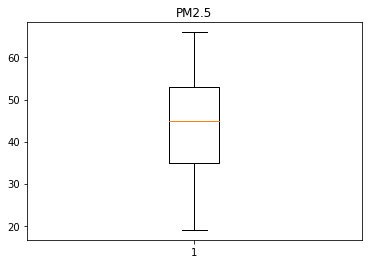

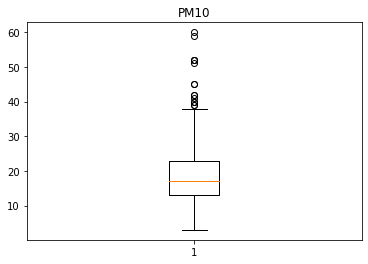

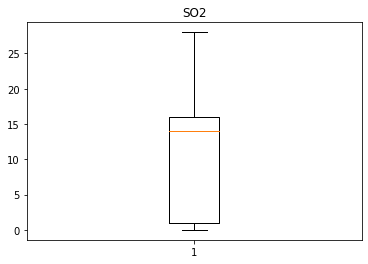

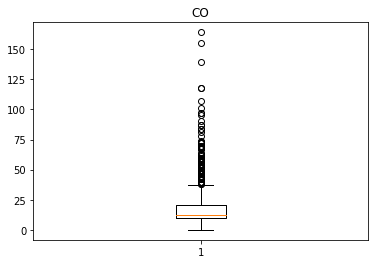

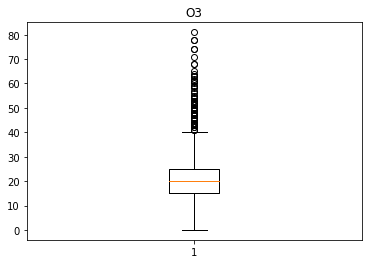

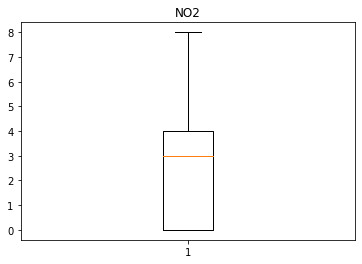

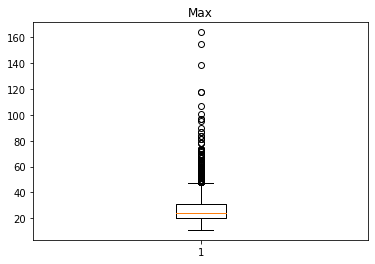

In [11]:
numerical= ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= True)
    plt.title(col)
    plt.show()

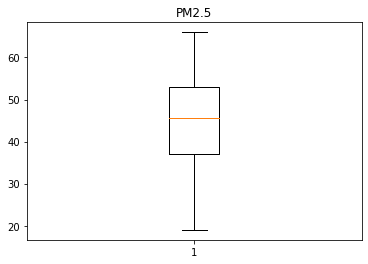

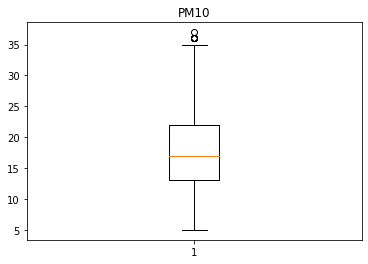

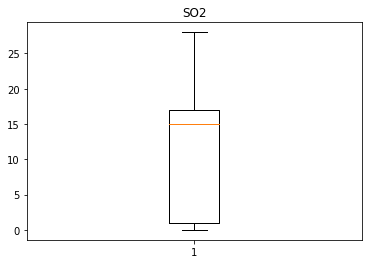

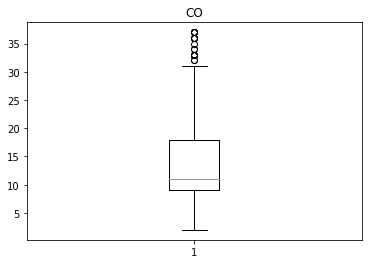

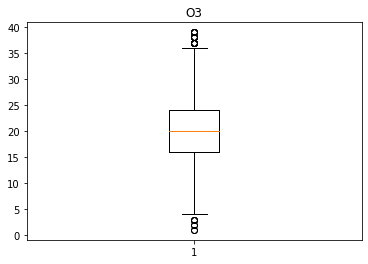

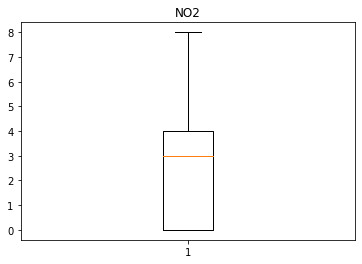

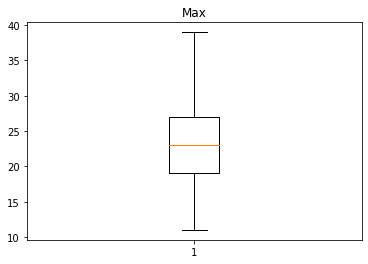

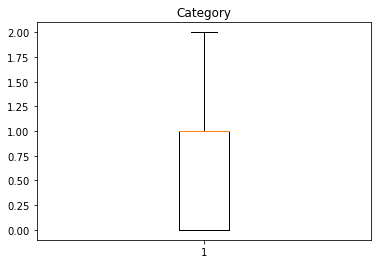

In [12]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Membuat salinan dataframe
df_copy = df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max', 'Category']].copy()

# Label encoding untuk kolom 'Category'
label_encoder = LabelEncoder()
df_copy['Category'] = label_encoder.fit_transform(df_copy['Category'])

def remove_outliers(df_copy):
    df_result = df_copy.copy()  # Buat salinan dataframe untuk menyimpan hasil penghapusan outlier
    for col in df_copy.columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df_result = df_result[(df_result[col] > lower_bound) & (df_result[col] < upper_bound)]
    return df_result

# Menghapus outlier
df_copy = remove_outliers(df_copy)

# Menampilkan boxplot
numerical = ['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']

for col in numerical:
    plt.boxplot(df_copy[col], vert=True)
    plt.title(col)
    plt.show()

# Tampilkan boxplot untuk kolom 'Category'
plt.boxplot(df_copy['Category'], vert=True)
plt.title('Category')
plt.show()


In [13]:
df = df_copy

## NOrmalisasi dengan minamx scaler

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data X yang akan dinormalisasi (kecuali 'IE EXP (%)')
X_data = df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']]

# Inisialisasi MinMaxScaler untuk X
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X_data)

# Mengganti kolom-kolom dalam data_model dengan data yang sudah dinormalisasi
df[['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Max']] = X_normalized

# Kolom 'IE EXP (%)' tidak perlu dinormalisasi
# Sekarang Anda dapat menggabungkan data yang sudah dinormalisasi dengan 'IE EXP (%)'
df = df

In [15]:
df

PM2.5     PM10       SO2        CO        O3  NO2       Max  Category
12    0.255319  0.18750  0.071429  0.771429  0.184211  0.0  0.642857         0
25    0.255319  0.43750  0.071429  0.857143  0.684211  0.0  0.750000         0
30    0.148936  0.37500  0.035714  0.885714  0.605263  0.0  0.785714         0
31    0.127660  0.75000  0.071429  1.000000  0.368421  0.0  0.928571         0
65    0.723404  0.43750  0.142857  0.542857  0.500000  0.0  0.357143         0
...        ...      ...       ...       ...       ...  ...       ...       ...
1091  0.659574  0.43750  0.571429  0.285714  0.525274  0.5  0.285714         1
1092  0.680851  0.46875  0.571429  0.285714  0.525274  0.5  0.321429         1
1093  0.702128  0.50000  0.571429  0.314286  0.525274  0.5  0.357143         1
1094  0.723404  0.53125  0.607143  0.314286  0.525274  0.5  0.392857         1
1095  0.723404  0.56250  0.607143  0.342857  0.525274  0.5  0.428571         1

[864 rows x 8 columns]

### Mengecek Outlier

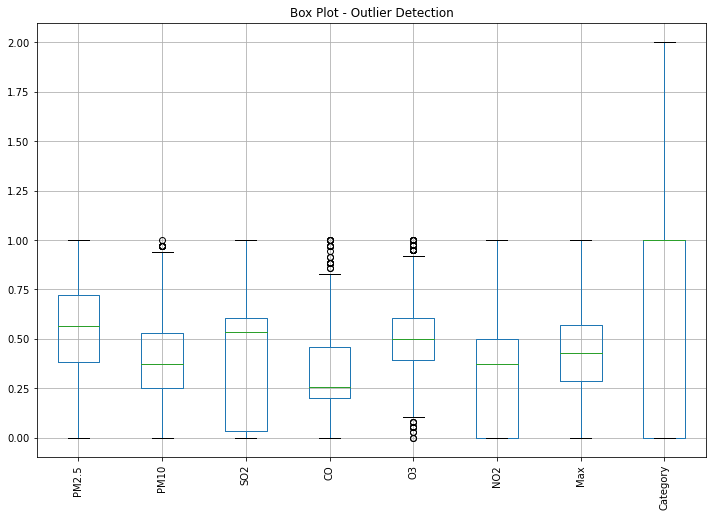

In [16]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=90)
plt.show()

# MOdeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## XGBOOST


Ratio 20:80
Accuracy: 0.8786127167630058
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        61
           1       0.89      0.93      0.91       107
           2       1.00      0.20      0.33         5

    accuracy                           0.88       173
   macro avg       0.91      0.66      0.70       173
weighted avg       0.88      0.88      0.87       173



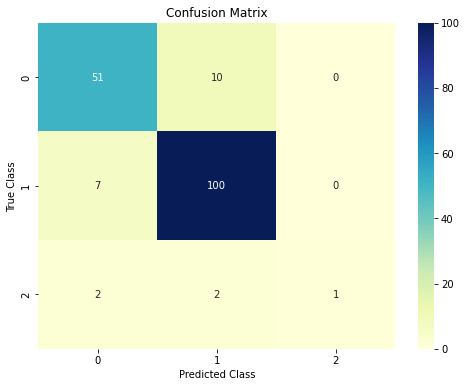

AUC Class 0: 0.96
AUC Class 1: 0.96
AUC Class 2: 0.95
Log Loss: 0.3901


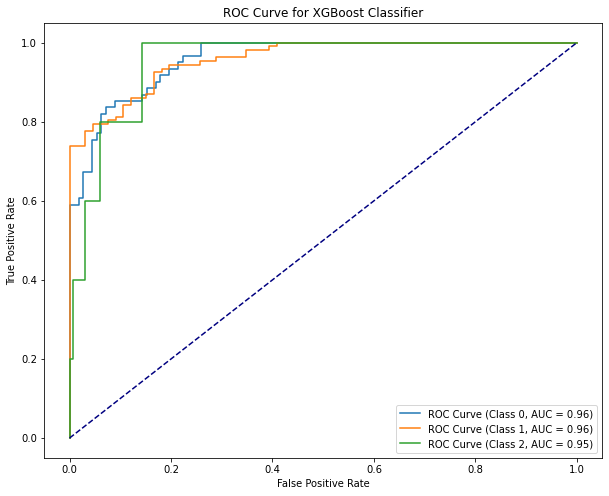


Ratio 30:70
Accuracy: 0.8653846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83        95
           1       0.90      0.89      0.90       160
           2       1.00      0.20      0.33         5

    accuracy                           0.87       260
   macro avg       0.90      0.65      0.69       260
weighted avg       0.87      0.87      0.86       260



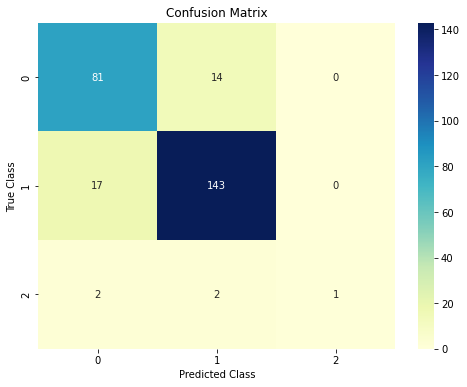

AUC Class 0: 0.95
AUC Class 1: 0.96
AUC Class 2: 0.96
Log Loss: 0.3680


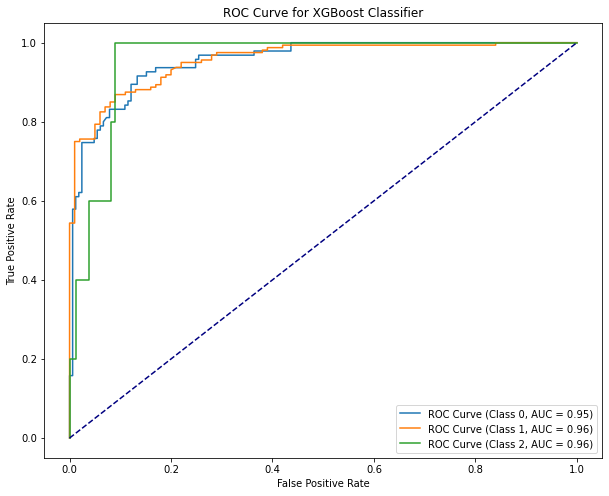


Ratio 40:60
Accuracy: 0.8728323699421965
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       129
           1       0.92      0.89      0.90       210
           2       0.60      0.43      0.50         7

    accuracy                           0.87       346
   macro avg       0.78      0.73      0.75       346
weighted avg       0.87      0.87      0.87       346



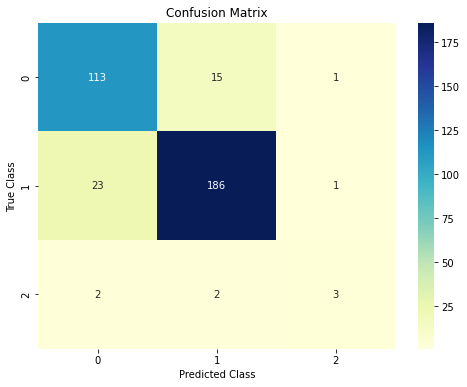

AUC Class 0: 0.95
AUC Class 1: 0.95
AUC Class 2: 0.96
Log Loss: 0.3510


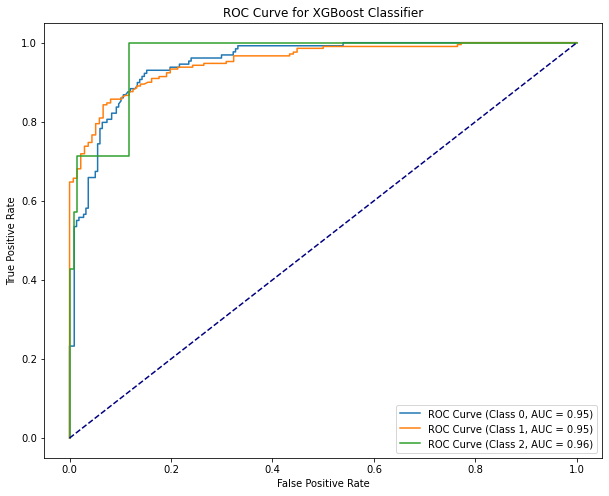

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(["Category"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model XGBoost
    xgb_classifier = XGBClassifier(random_state=42)

    # Melatih model
    xgb_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = xgb_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = xgb_classifier.predict_proba(X_test)

    # Memvisualisasikan Confusion Matrix
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## AdaBoost 


Ratio 20:80
Accuracy: 0.4161849710982659
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.48      0.37        61
           1       0.55      0.40      0.46       107
           2       0.00      0.00      0.00         5

    accuracy                           0.42       173
   macro avg       0.29      0.29      0.28       173
weighted avg       0.45      0.42      0.42       173



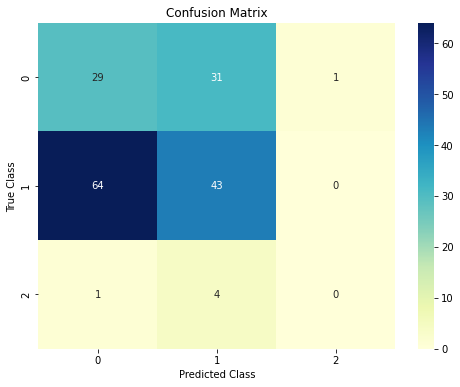

AUC Class 0: 0.47
AUC Class 1: 0.48
AUC Class 2: 0.96
Log Loss: 0.8215


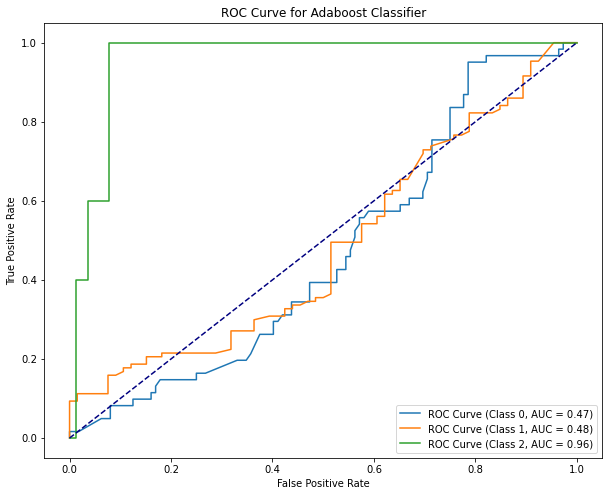


Ratio 30:70
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.60      0.43        95
           1       0.55      0.29      0.38       160
           2       0.14      0.20      0.17         5

    accuracy                           0.40       260
   macro avg       0.34      0.36      0.33       260
weighted avg       0.46      0.40      0.39       260



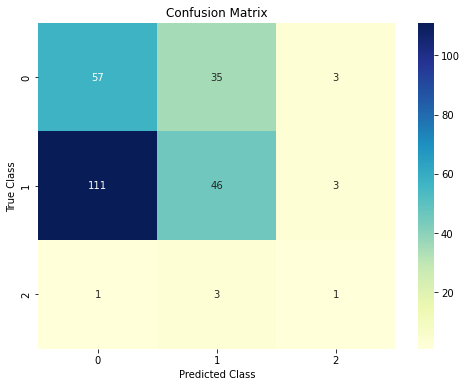

AUC Class 0: 0.43
AUC Class 1: 0.50
AUC Class 2: 0.96
Log Loss: 0.8572


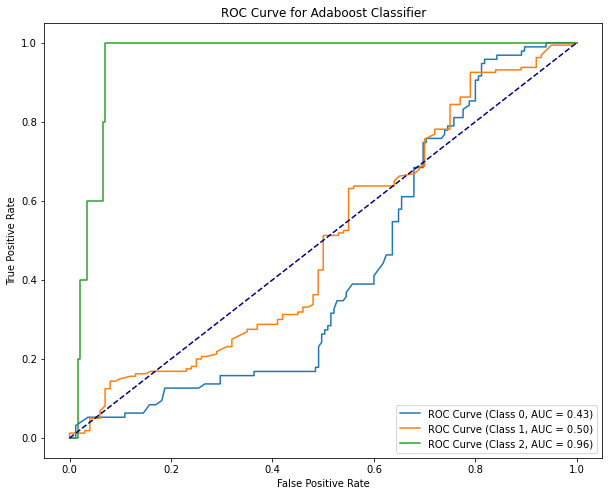


Ratio 40:60
Accuracy: 0.4277456647398844
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.57      0.43       129
           1       0.57      0.34      0.43       210
           2       0.27      0.43      0.33         7

    accuracy                           0.43       346
   macro avg       0.40      0.45      0.40       346
weighted avg       0.48      0.43      0.43       346



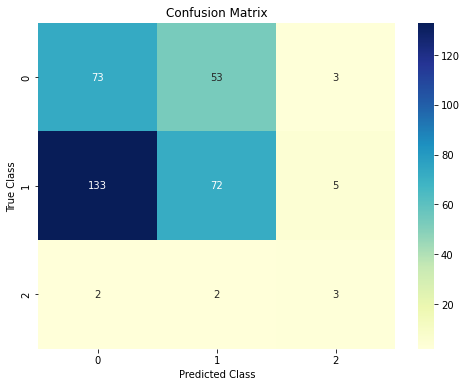

AUC Class 0: 0.45
AUC Class 1: 0.43
AUC Class 2: 0.96
Log Loss: 0.8193


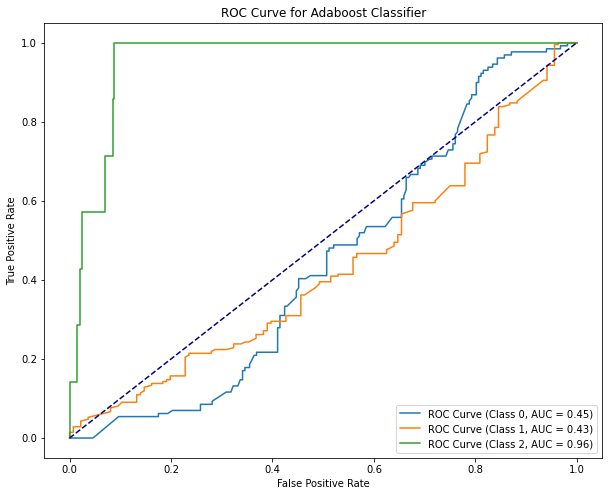

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(["Category"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]
# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model Adaboost dengan Decision Tree Classifier sebagai base estimator
    ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

    # Melatih model
    ada_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = ada_classifier.predict(X_test)

    # Menghitung matriks kebingungan
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    
    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = ada_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Adaboost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## Gradient Boosting Clasifire


Ratio 20:80
Accuracy: 0.8554913294797688
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        61
           1       0.88      0.92      0.90       107
           2       0.00      0.00      0.00         5

    accuracy                           0.86       173
   macro avg       0.57      0.58      0.57       173
weighted avg       0.84      0.86      0.85       173



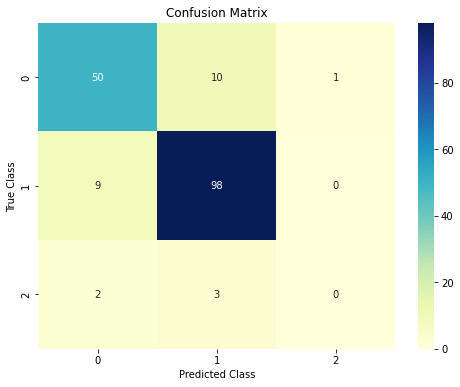

AUC Class 0: 0.93
AUC Class 1: 0.93
AUC Class 2: 0.96
Log Loss: 0.4007


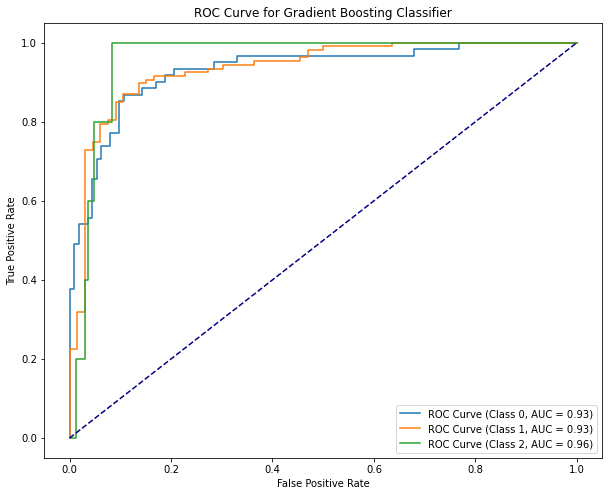


Ratio 30:70
Accuracy: 0.8153846153846154
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        95
           1       0.88      0.83      0.86       160
           2       0.33      0.20      0.25         5

    accuracy                           0.82       260
   macro avg       0.65      0.62      0.63       260
weighted avg       0.82      0.82      0.81       260



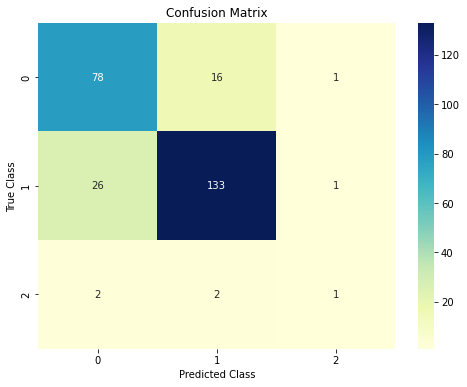

AUC Class 0: 0.92
AUC Class 1: 0.92
AUC Class 2: 0.96
Log Loss: 0.3906


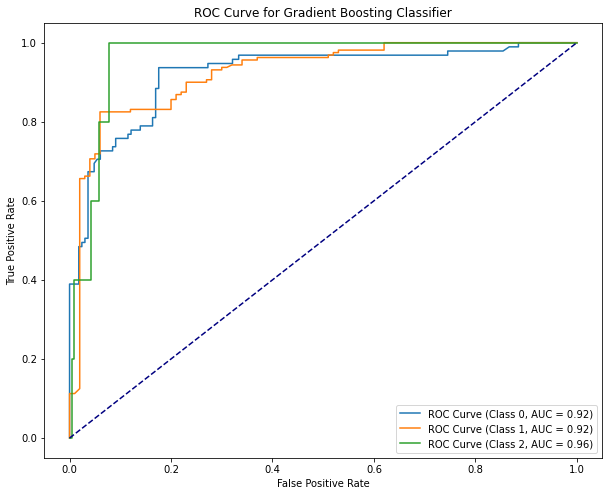


Ratio 40:60
Accuracy: 0.8323699421965318
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       129
           1       0.88      0.86      0.87       210
           2       0.33      0.29      0.31         7

    accuracy                           0.83       346
   macro avg       0.67      0.65      0.66       346
weighted avg       0.83      0.83      0.83       346



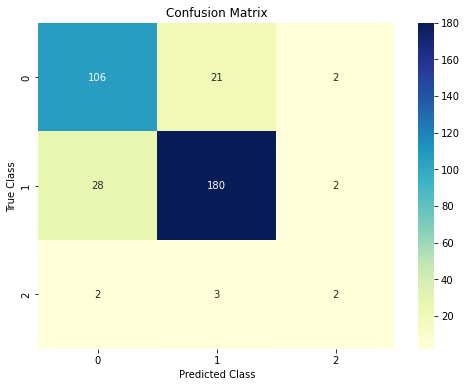

AUC Class 0: 0.93
AUC Class 1: 0.92
AUC Class 2: 0.96
Log Loss: 0.3870


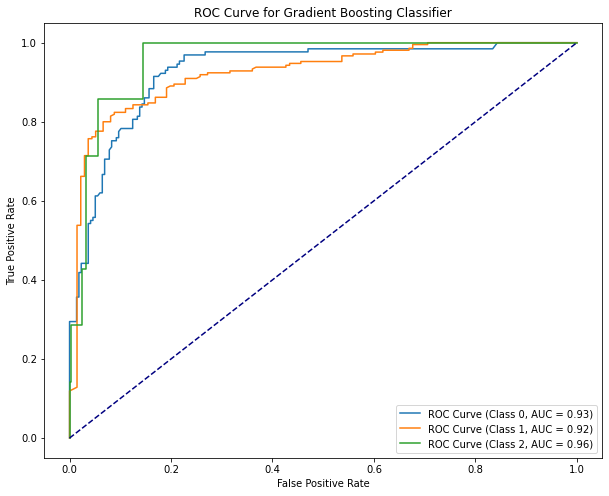

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting data
X = df.drop(["Category"], axis=1)
y = df["Category"]

# Encoding string labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=ratio, random_state=42)

    # Membuat model Gradient Boosting
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Melatih model
    gb_classifier.fit(X_train, y_train)

    # Melakukan prediksi pada data testing
    y_pred = gb_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    
    # Menghitung matriks kebingungan
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = gb_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve((y_test == i).astype(int),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Gradient Boosting Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## CatBoosting


Ratio 20:80
Accuracy: 0.8728323699421965
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.88      0.93      0.90       107
           2       0.50      0.20      0.29         5

    accuracy                           0.87       173
   macro avg       0.75      0.65      0.68       173
weighted avg       0.87      0.87      0.87       173



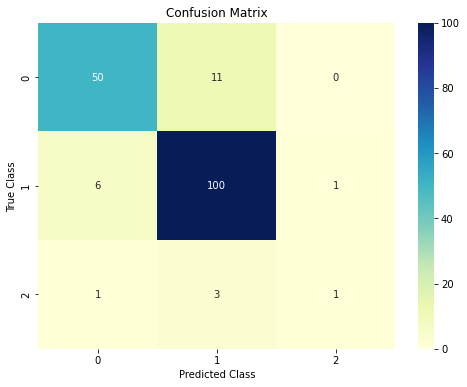

AUC Class 0: 0.95
AUC Class 1: 0.95
AUC Class 2: 0.96
Log Loss: 0.3561


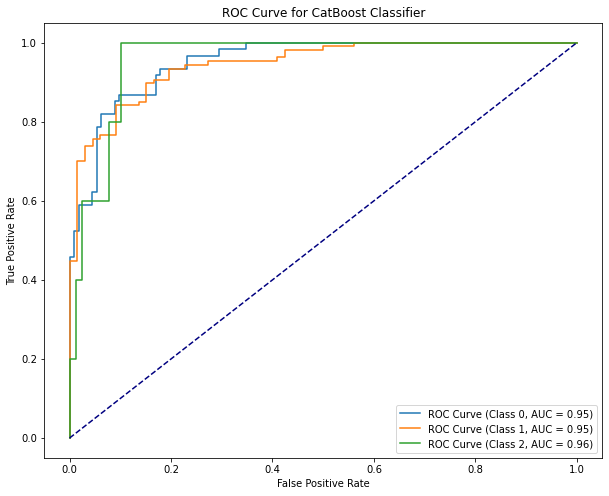


Ratio 30:70
Accuracy: 0.8730769230769231
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        95
           1       0.90      0.91      0.90       160
           2       0.50      0.20      0.29         5

    accuracy                           0.87       260
   macro avg       0.75      0.65      0.68       260
weighted avg       0.87      0.87      0.87       260



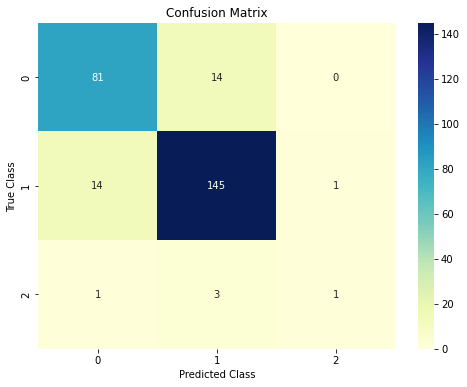

AUC Class 0: 0.95
AUC Class 1: 0.94
AUC Class 2: 0.96
Log Loss: 0.3434


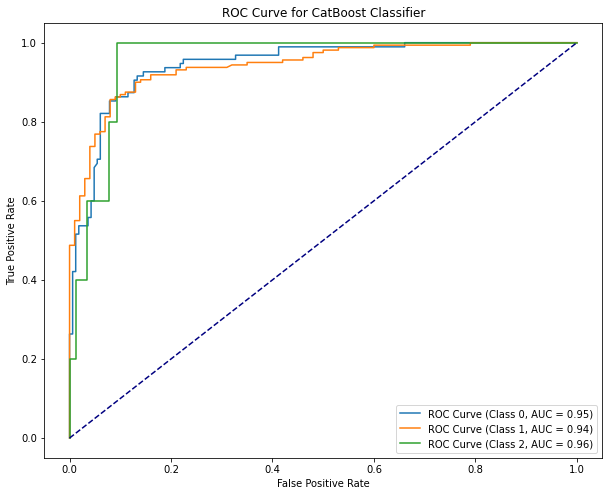


Ratio 40:60
Accuracy: 0.869942196531792
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       129
           1       0.90      0.90      0.90       210
           2       0.50      0.43      0.46         7

    accuracy                           0.87       346
   macro avg       0.75      0.73      0.73       346
weighted avg       0.87      0.87      0.87       346



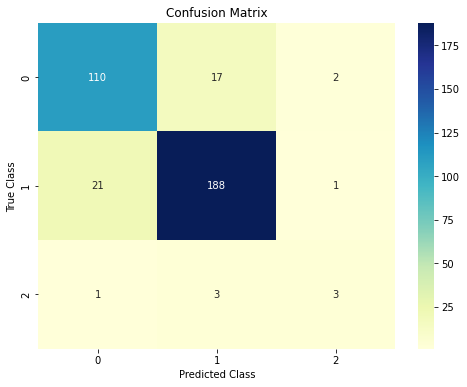

AUC Class 0: 0.94
AUC Class 1: 0.94
AUC Class 2: 0.96
Log Loss: 0.3477


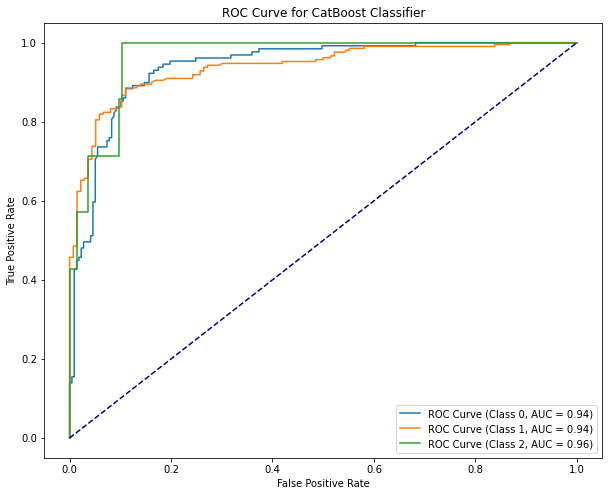

In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting data
X = df.drop(["Category"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model CatBoost
    catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

    # Melatih model
    catboost_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = catboost_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)
    
    # Menghitung matriks kebingungan
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = catboost_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {class_label}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == i).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {class_label}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CatBoost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


# Implementasi SMOTE pada Model Boosting dengan HOCV

In [22]:
from imblearn.over_sampling import SMOTE  # imblearn untuk penanganan ketidakseimbangan kelas (Oversampling)
# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42) #Memangil SMOTE dengan random state 42  menghasilkan hasil yang dapat direproduksi secara konsisten. 
X_resampled, y_resampled = smote.fit_resample(X, y) # menyimpan hasil over samping tersebut pada x y resampled

## XGBOOST SMOTE


Ratio 20:80
Accuracy: 0.9348534201954397
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.93      0.88      0.90       104
           2       0.98      1.00      0.99       115

    accuracy                           0.93       307
   macro avg       0.93      0.93      0.93       307
weighted avg       0.94      0.93      0.93       307



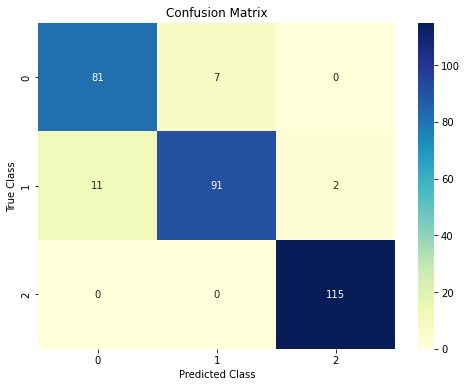

AUC Class 0: 0.99
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2111


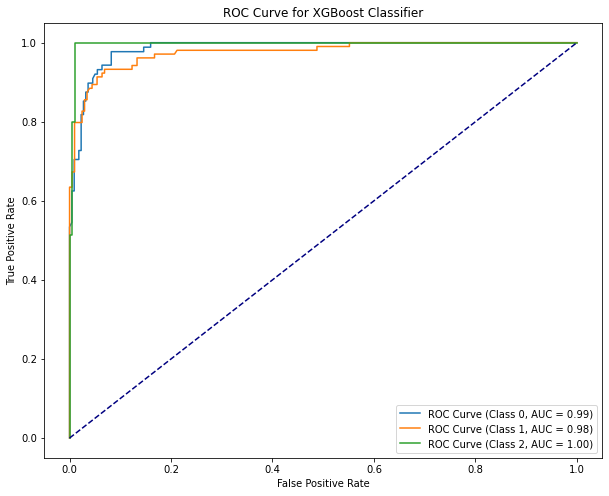


Ratio 30:70
Accuracy: 0.9304347826086956
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       142
           1       0.91      0.88      0.89       154
           2       0.98      1.00      0.99       164

    accuracy                           0.93       460
   macro avg       0.93      0.93      0.93       460
weighted avg       0.93      0.93      0.93       460



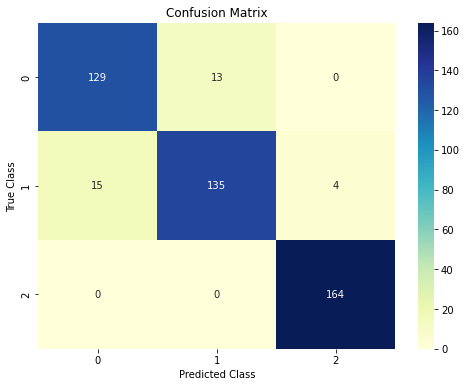

AUC Class 0: 0.99
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2107


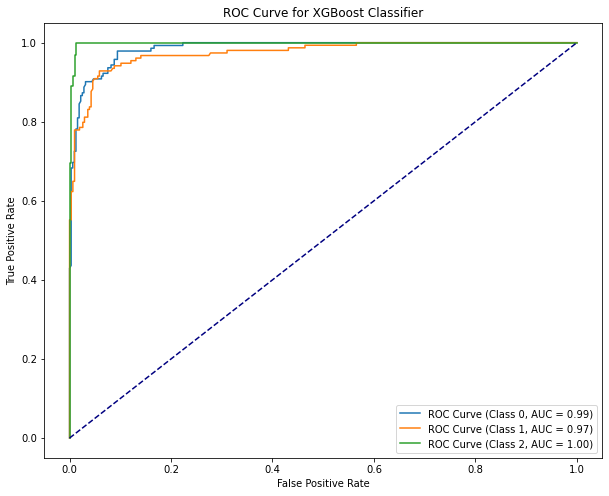


Ratio 40:60
Accuracy: 0.9218241042345277
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       200
           1       0.88      0.91      0.89       203
           2       0.97      1.00      0.98       211

    accuracy                           0.92       614
   macro avg       0.92      0.92      0.92       614
weighted avg       0.92      0.92      0.92       614



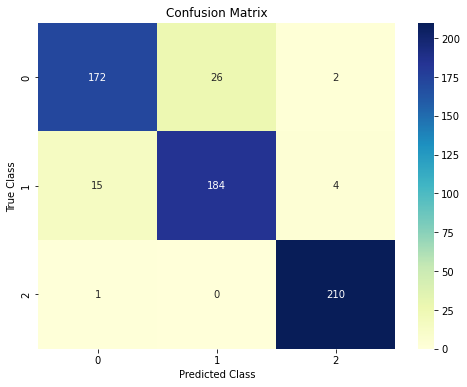

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2223


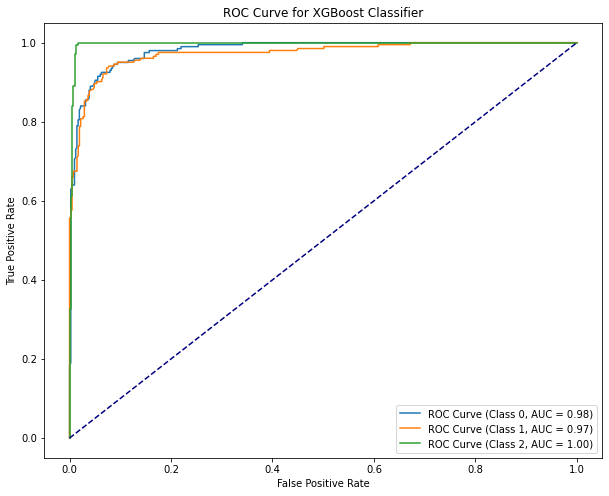

In [23]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model XGBoost
    xgb_classifier = XGBClassifier(random_state=42)

    # Melatih model
    xgb_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = xgb_classifier.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = xgb_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(xgb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for XGBoost Classifier')
    plt.legend()
    
    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()
    
    

## ADABoost SMOTE


Ratio 20:80
Accuracy: 0.6710097719869706
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.80      0.60        88
           1       0.53      0.27      0.36       104
           2       0.98      0.94      0.96       115

    accuracy                           0.67       307
   macro avg       0.67      0.67      0.64       307
weighted avg       0.69      0.67      0.65       307



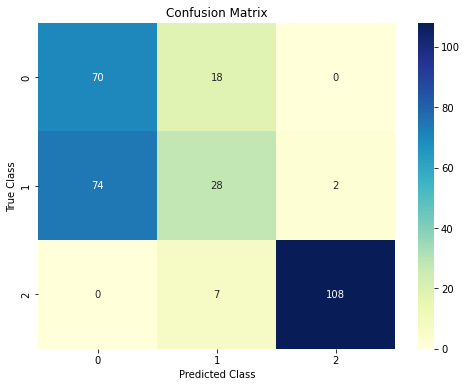

AUC Class 0: 0.71
AUC Class 1: 0.74
AUC Class 2: 1.00
Log Loss: 0.8706


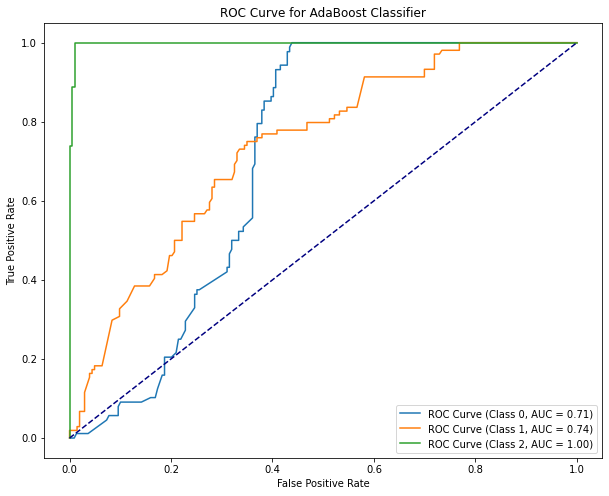


Ratio 30:70
Accuracy: 0.6695652173913044
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.79      0.60       142
           1       0.54      0.21      0.31       154
           2       0.96      0.99      0.98       164

    accuracy                           0.67       460
   macro avg       0.66      0.67      0.63       460
weighted avg       0.67      0.67      0.64       460



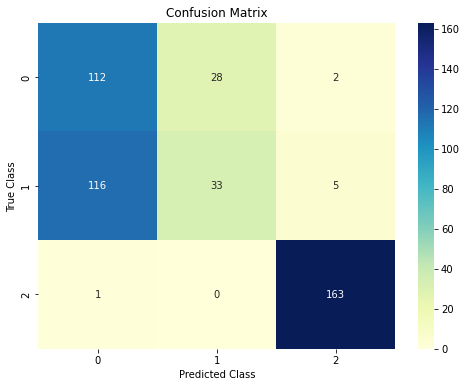

AUC Class 0: 0.72
AUC Class 1: 0.67
AUC Class 2: 0.99
Log Loss: 0.8883


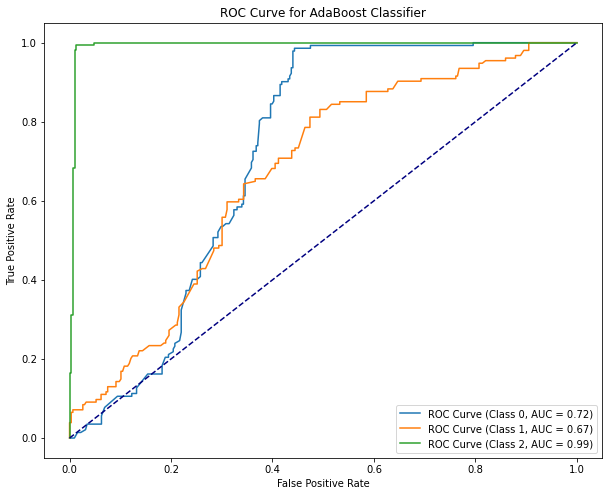


Ratio 40:60
Accuracy: 0.6335504885993485
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.57      0.52       200
           1       0.46      0.35      0.40       203
           2       0.94      0.96      0.95       211

    accuracy                           0.63       614
   macro avg       0.63      0.63      0.62       614
weighted avg       0.63      0.63      0.63       614



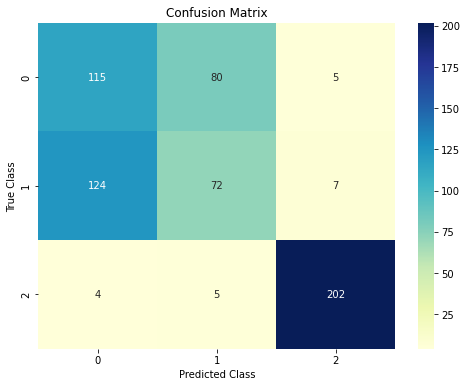

AUC Class 0: 0.69
AUC Class 1: 0.74
AUC Class 2: 0.99
Log Loss: 0.8882


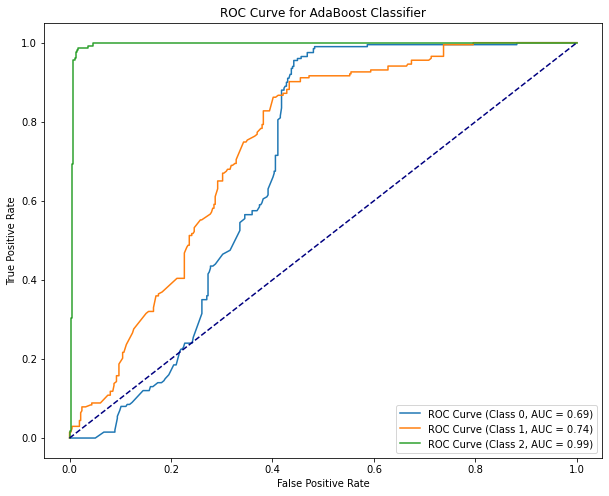

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model Adaboost dengan Decision Tree Classifier sebagai base estimator
    ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

    # Melatih model
    ada_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = ada_classifier.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = ada_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(ada_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for AdaBoost Classifier')
    plt.legend()
    
    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## GradientBoosting Clasifire SMOTE


Ratio 20:80
Accuracy: 0.9218241042345277
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        88
           1       0.93      0.84      0.88       104
           2       0.97      1.00      0.99       115

    accuracy                           0.92       307
   macro avg       0.92      0.92      0.92       307
weighted avg       0.92      0.92      0.92       307



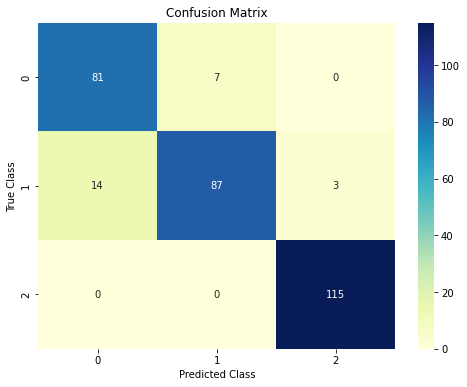

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2266


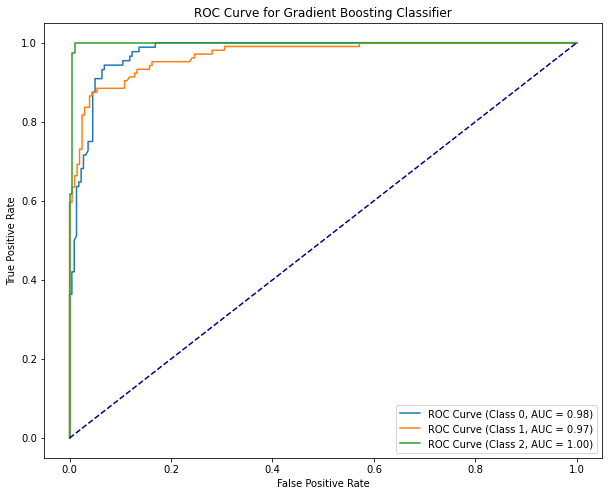


Ratio 30:70
Accuracy: 0.9195652173913044
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       142
           1       0.91      0.85      0.88       154
           2       0.96      1.00      0.98       164

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460



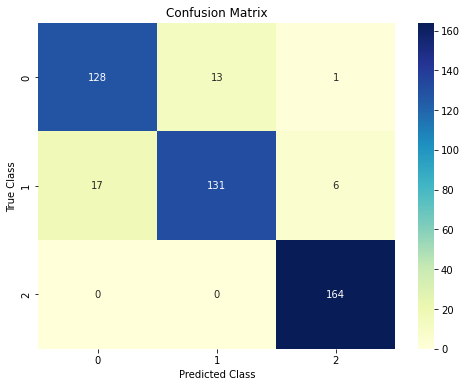

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2312


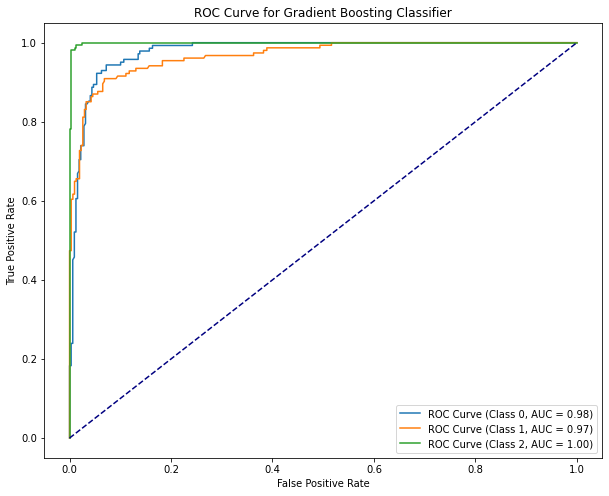


Ratio 40:60
Accuracy: 0.9153094462540716
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       200
           1       0.89      0.86      0.87       203
           2       0.97      1.00      0.98       211

    accuracy                           0.92       614
   macro avg       0.91      0.91      0.91       614
weighted avg       0.91      0.92      0.91       614



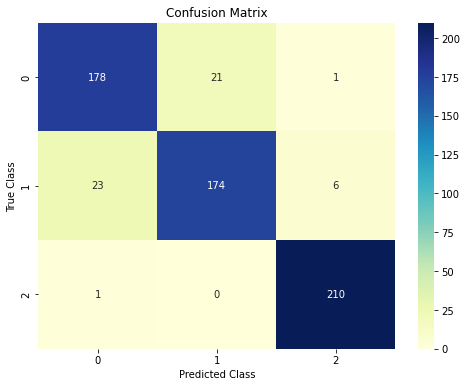

AUC Class 0: 0.97
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2461


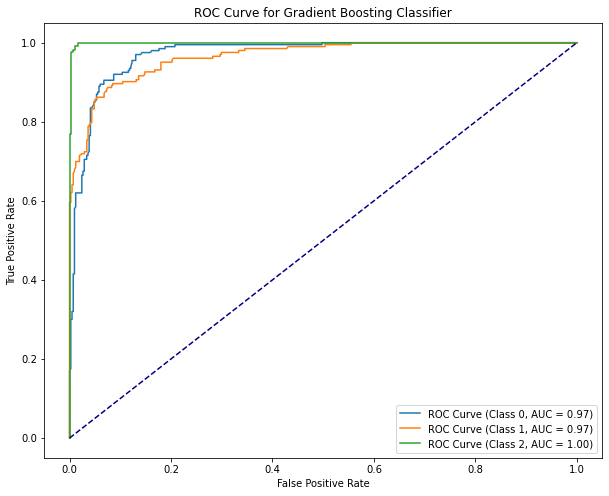

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
    # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    # Membuat model Gradient Boosting
    gb_classifier = GradientBoostingClassifier(random_state=42)

    # Melatih model
    gb_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = gb_classifier.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred)
    confusion_mat = confusion_matrix(y_test_encoded, y_pred)

    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

    # Memvisualisasikan Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = gb_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i in range(gb_classifier.n_classes_):
        fpr, tpr, _ = roc_curve(label_binarize(y_test_encoded, classes=[i]),
                                y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Gradient Boosting Classifier')
    plt.legend()
    
    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


## CatBoosting SMOTE


Ratio 20:80
Accuracy: 0.9381107491856677
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        88
           1       0.92      0.89      0.91       104
           2       0.98      1.00      0.99       115

    accuracy                           0.94       307
   macro avg       0.93      0.93      0.93       307
weighted avg       0.94      0.94      0.94       307

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1916


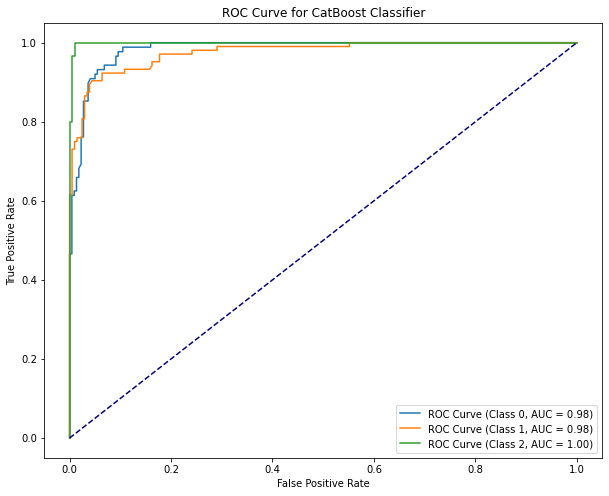


Ratio 30:70
Accuracy: 0.9326086956521739
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       142
           1       0.91      0.88      0.90       154
           2       0.98      1.00      0.99       164

    accuracy                           0.93       460
   macro avg       0.93      0.93      0.93       460
weighted avg       0.93      0.93      0.93       460

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.1983


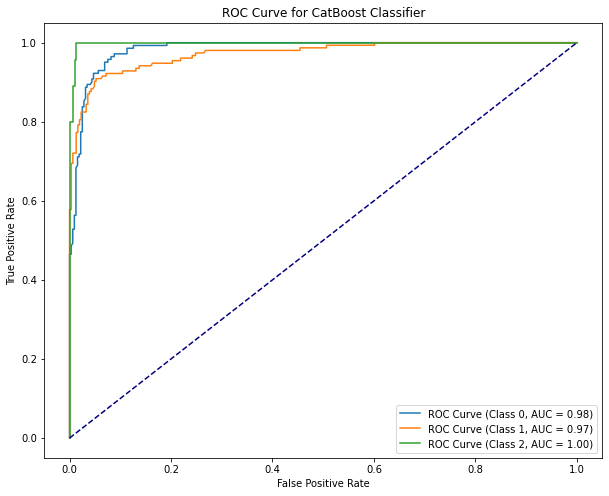


Ratio 40:60
Accuracy: 0.9267100977198697
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       200
           1       0.90      0.89      0.89       203
           2       0.97      1.00      0.99       211

    accuracy                           0.93       614
   macro avg       0.93      0.93      0.93       614
weighted avg       0.93      0.93      0.93       614

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2160


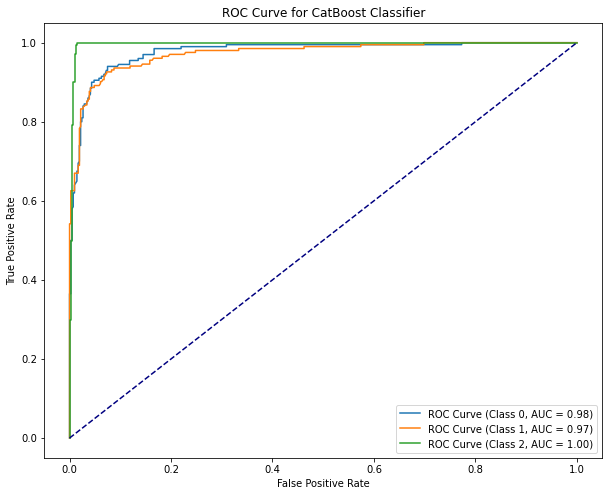

In [26]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Splitting data
X = df.drop(["Category"], axis=1)
y = df["Category"]

# List of ratios
ratios = [0.2, 0.3, 0.4]

for ratio in ratios:
     # Pembagian data training dan testing
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=ratio, random_state=42)
    
    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    
    # Membuat model CatBoost
    catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

    # Melatih model
    catboost_classifier.fit(X_train, y_train_encoded)

    # Melakukan prediksi pada data testing
    y_pred = catboost_classifier.predict(X_test)

    # Mengukur akurasi model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"\nRatio {ratio*100:.0f}:{(1-ratio)*100:.0f}")
    print("Accuracy:", accuracy)

    # Menampilkan classification report
    report = classification_report(y_test_encoded, y_pred)
    print("Classification Report:\n", report)

    # Menghitung probabilitas prediksi untuk setiap kelas
    y_probabilities = catboost_classifier.predict_proba(X_test)

    # Menghitung nilai AUC untuk setiap kelas
    auc_scores = []
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == class_label).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f"AUC Class {class_label}: {roc_auc:.2f}")

    # Menampilkan kurva ROC untuk setiap kelas
    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(catboost_classifier.classes_):
        fpr, tpr, _ = roc_curve((y_test_encoded == class_label).astype(int), y_probabilities[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"ROC Curve (Class {class_label}, AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for CatBoost Classifier')
    plt.legend()

    # Menghitung log loss
    logloss = log_loss(y_test_encoded, y_probabilities)
    print(f'Log Loss: {logloss:.4f}')

    plt.show()


In [32]:
import pickle
# Menyimpan model ke dalam file pkl
with open('catboost_model_no_outlier.pkl', 'wb') as model_file:
    pickle.dump(catboost_classifier, model_file)

# Implementasi SMOTE pada Model Boosting dengan Kfold 5, 10

## XGBOOST FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.9348534201954397
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        88
           1       0.93      0.88      0.90       104
           2       0.98      1.00      0.99       115

    accuracy                           0.93       307
   macro avg       0.93      0.93      0.93       307
weighted avg       0.94      0.93      0.93       307



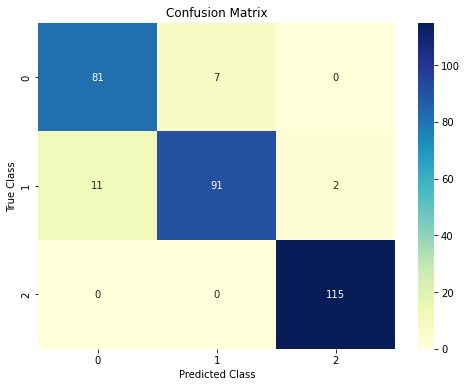

AUC Class 0: 0.99
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2111


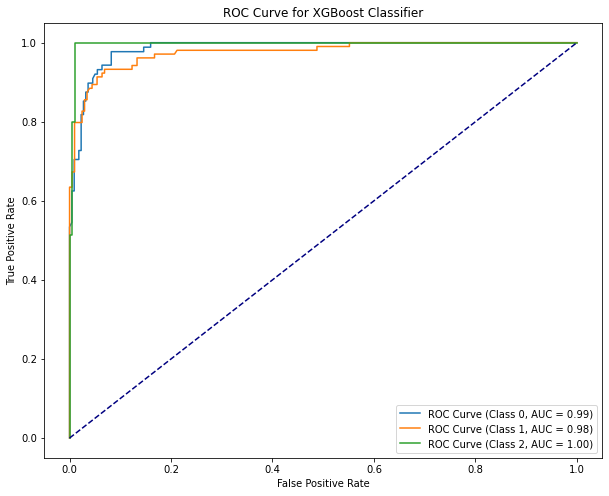


Accuracy: 0.9153094462540716
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       112
           1       0.85      0.92      0.88        99
           2       0.97      0.99      0.98        96

    accuracy                           0.92       307
   macro avg       0.92      0.92      0.92       307
weighted avg       0.92      0.92      0.92       307



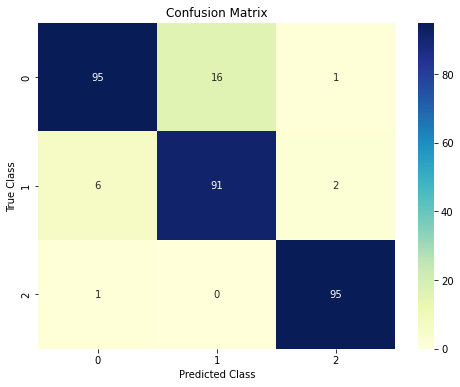

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2453


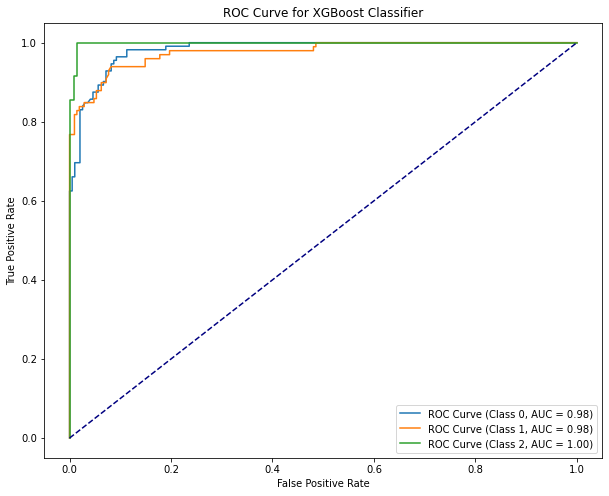


Accuracy: 0.9283387622149837
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.94      0.89      0.91       115
           2       0.95      1.00      0.97        94

    accuracy                           0.93       307
   macro avg       0.93      0.93      0.93       307
weighted avg       0.93      0.93      0.93       307



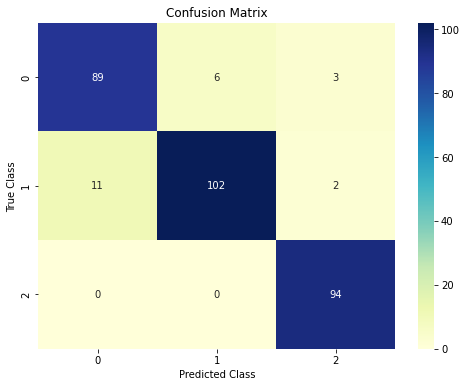

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2319


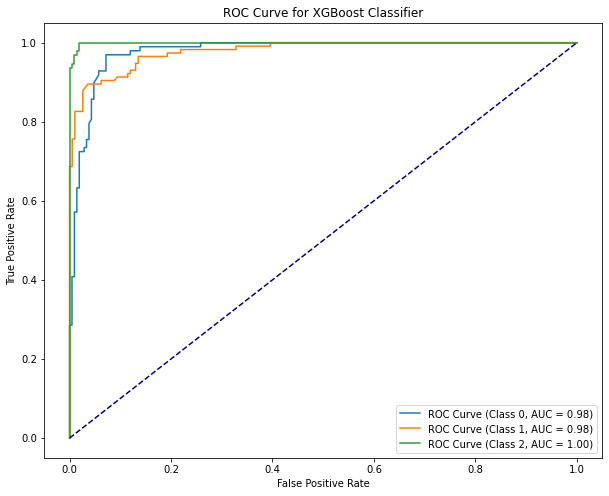


Accuracy: 0.9117647058823529
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89       113
           1       0.88      0.89      0.89       104
           2       0.95      0.99      0.97        89

    accuracy                           0.91       306
   macro avg       0.91      0.92      0.91       306
weighted avg       0.91      0.91      0.91       306



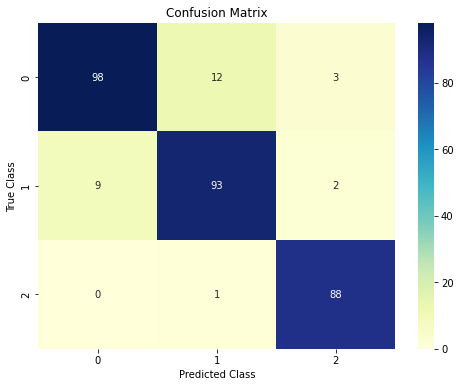

AUC Class 0: 0.97
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.2920


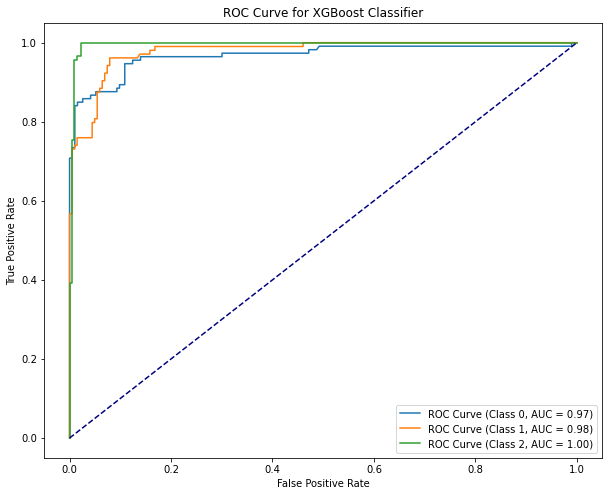


Accuracy: 0.9248366013071896
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.88      0.88      0.88        89
           2       0.98      0.99      0.99       117

    accuracy                           0.92       306
   macro avg       0.92      0.92      0.92       306
weighted avg       0.92      0.92      0.92       306



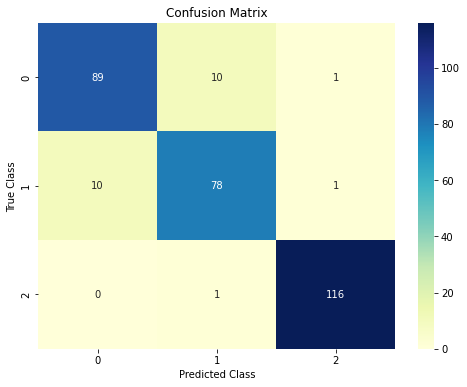

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2195


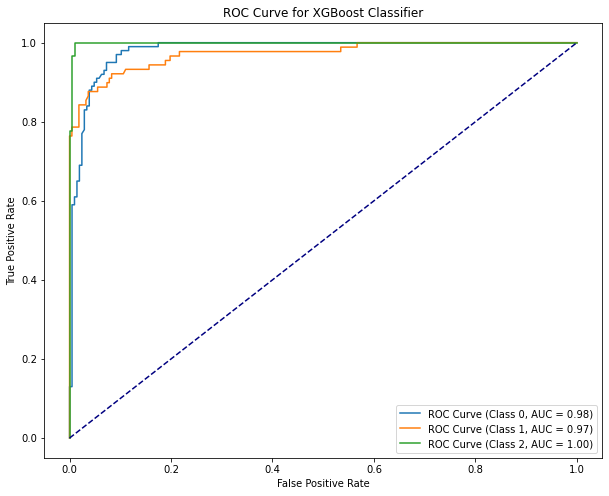


Average Accuracy for 5-fold: 0.9230205871708075
Average AUC for 5-fold: 0.9842948145583094
Average Log Loss for 5-fold: 0.23998598669259744
--------------------------------------------------


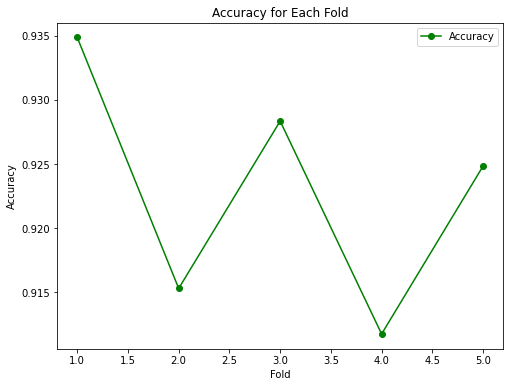

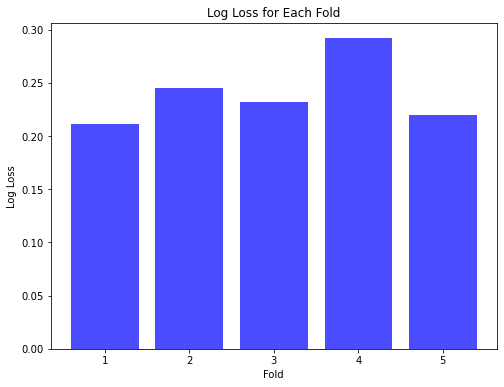


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.934853  0.985841  0.211149
1     2  0.915309  0.985772  0.245296
2     3  0.928339  0.985531  0.231933
3     4  0.911765  0.980455  0.292007
4     5  0.924837  0.983874  0.219545
--------------------------------------------------
KFold=10

Accuracy: 0.948051948051948
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.93      0.93      0.93        55
           2       0.98      1.00      0.99        57

    accuracy                           0.95       154
   macro avg       0.95      0.94      0.94       154
weighted avg       0.95      0.95      0.95       154



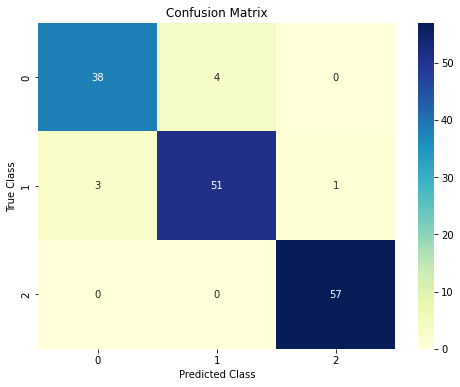

AUC Class 0: 0.99
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1603


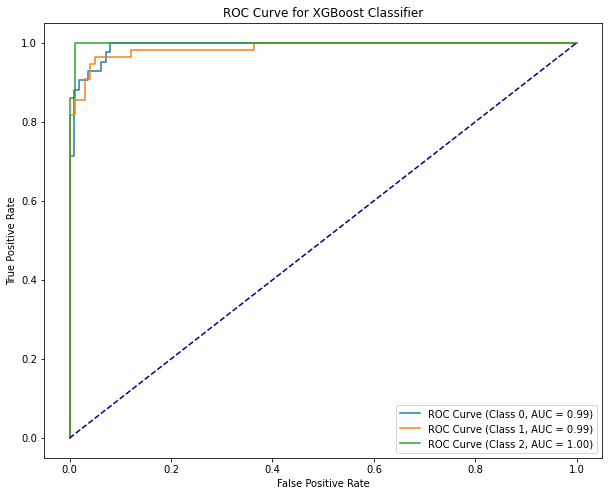


Accuracy: 0.922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.89      0.86      0.88        49
           2       0.98      1.00      0.99        58

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



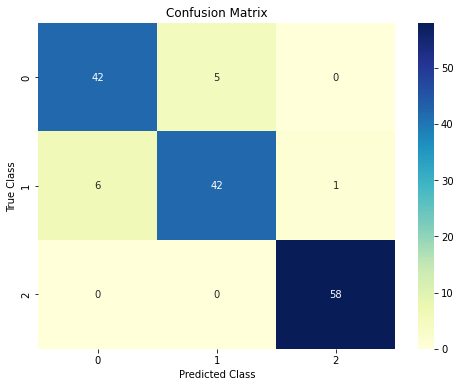

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2604


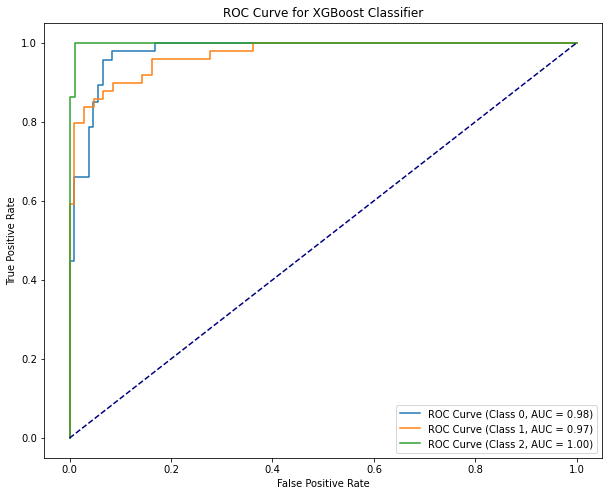


Accuracy: 0.9415584415584416
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        54
           1       0.89      0.94      0.91        51
           2       0.96      1.00      0.98        49

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.94       154



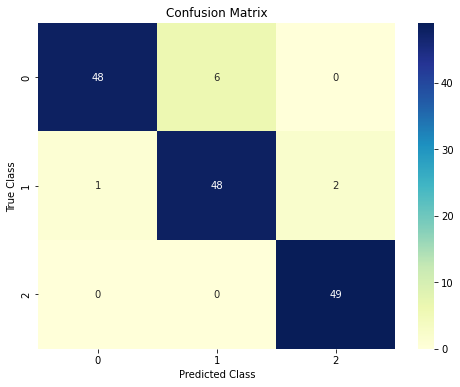

AUC Class 0: 0.99
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2120


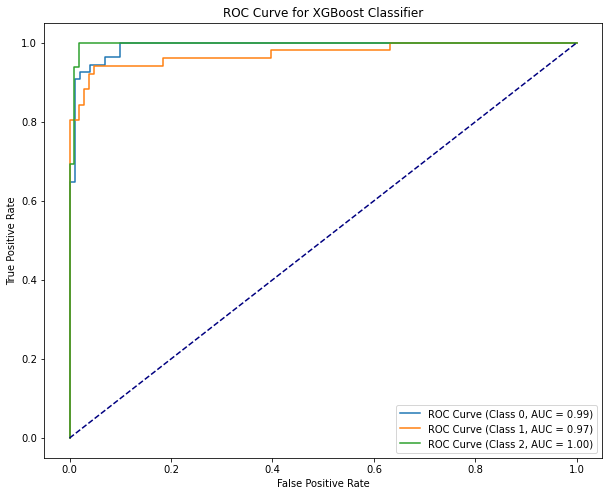


Accuracy: 0.9215686274509803
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        57
           1       0.88      0.94      0.91        49
           2       0.96      0.98      0.97        47

    accuracy                           0.92       153
   macro avg       0.92      0.93      0.92       153
weighted avg       0.92      0.92      0.92       153



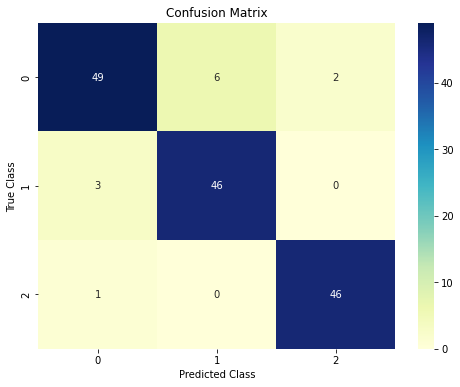

AUC Class 0: 0.98
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.2268


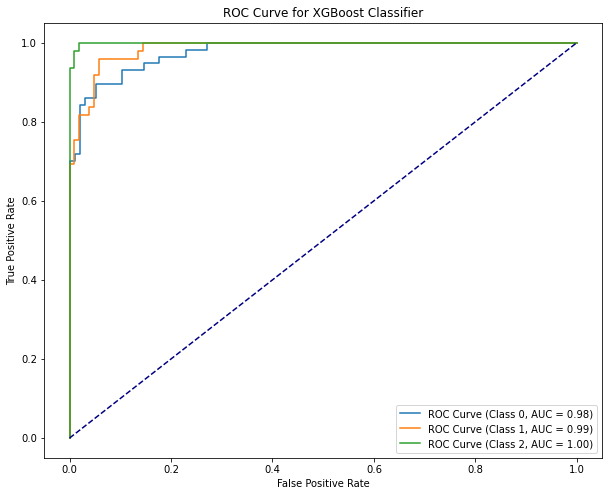


Accuracy: 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.97      0.92      0.94        62
           2       0.92      1.00      0.96        44

    accuracy                           0.94       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.94      0.94      0.94       153



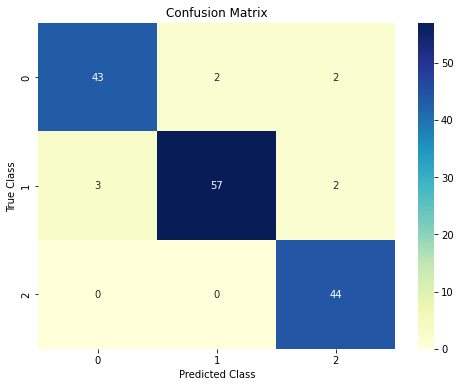

AUC Class 0: 0.99
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1670


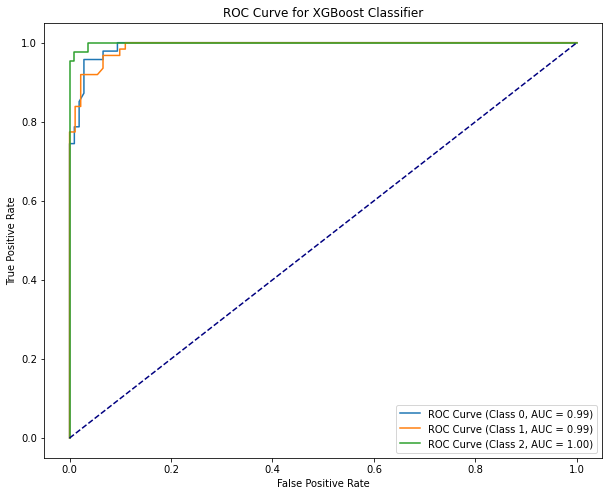


Accuracy: 0.9150326797385621
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87        51
           1       0.90      0.87      0.88        52
           2       0.98      1.00      0.99        50

    accuracy                           0.92       153
   macro avg       0.92      0.92      0.92       153
weighted avg       0.91      0.92      0.91       153



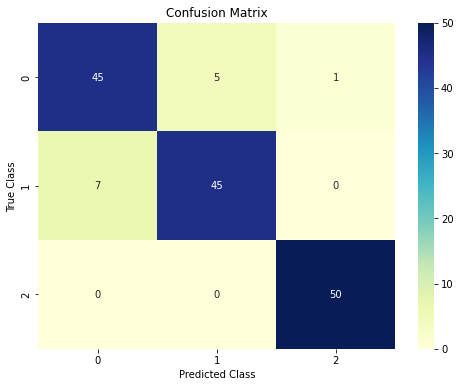

AUC Class 0: 0.97
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2702


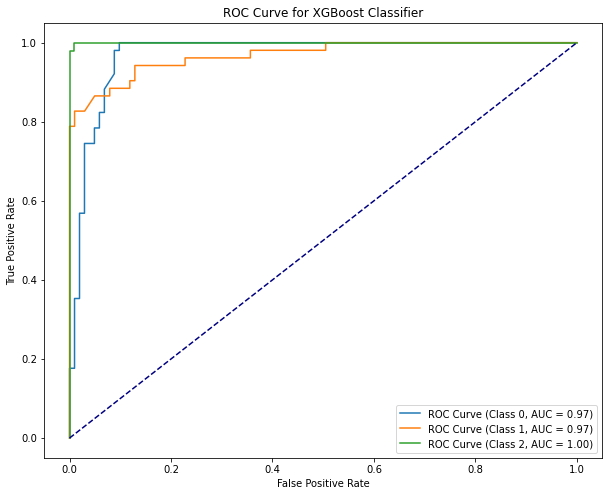


Accuracy: 0.8758169934640523
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        64
           1       0.81      0.89      0.85        53
           2       0.95      1.00      0.97        36

    accuracy                           0.88       153
   macro avg       0.88      0.89      0.89       153
weighted avg       0.88      0.88      0.87       153



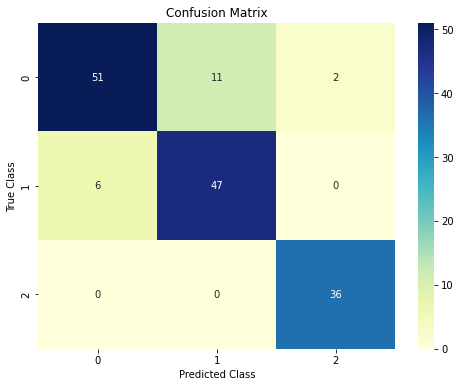

AUC Class 0: 0.96
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.3771


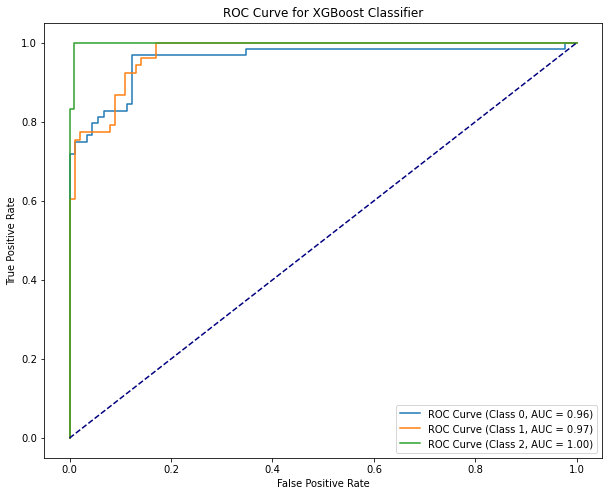


Accuracy: 0.934640522875817
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.94      0.86      0.90        51
           2       0.98      1.00      0.99        53

    accuracy                           0.93       153
   macro avg       0.93      0.93      0.93       153
weighted avg       0.94      0.93      0.93       153



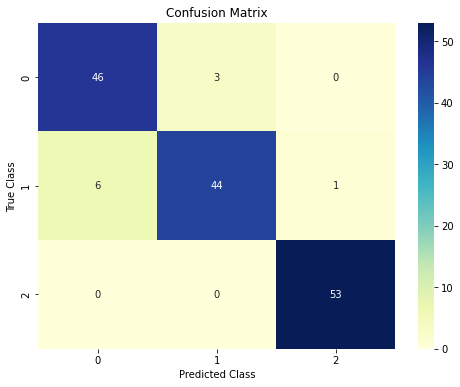

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1924


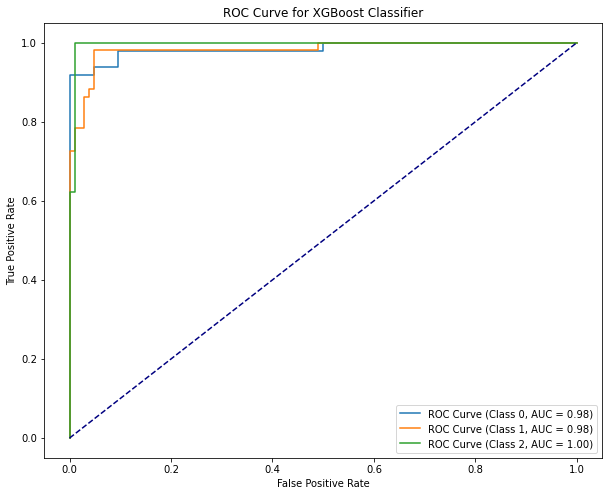


Accuracy: 0.9281045751633987
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.89      0.82      0.85        39
           2       0.99      1.00      0.99        67

    accuracy                           0.93       153
   macro avg       0.92      0.91      0.91       153
weighted avg       0.93      0.93      0.93       153



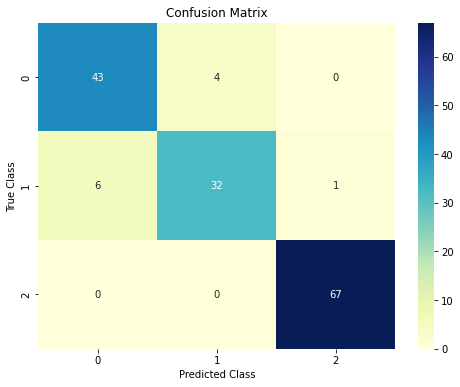

AUC Class 0: 0.98
AUC Class 1: 0.96
AUC Class 2: 1.00
Log Loss: 0.2242


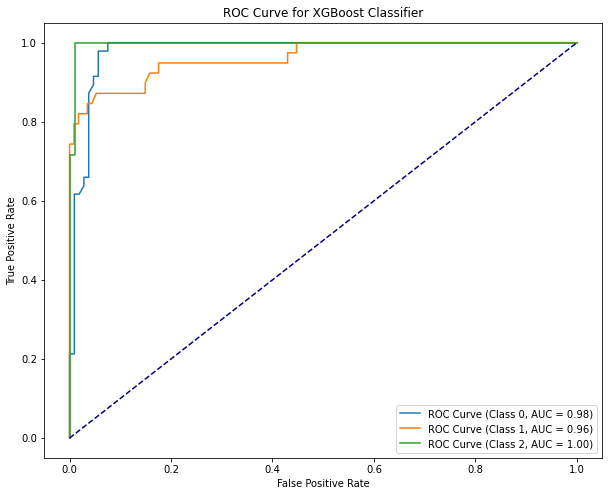


Accuracy: 0.934640522875817
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.90      0.92      0.91        50
           2       0.98      0.98      0.98        50

    accuracy                           0.93       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.93      0.93      0.93       153



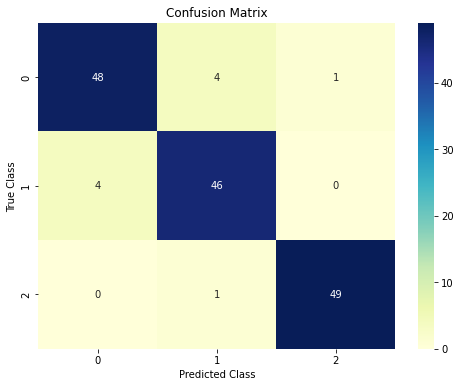

AUC Class 0: 0.98
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1815


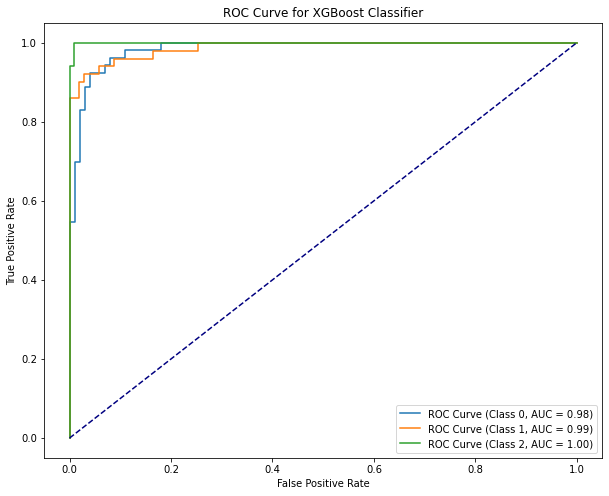


Average Accuracy for 10-fold: 0.9262668703845176
Average AUC for 10-fold: 0.9855973596846972
Average Log Loss for 10-fold: 0.2271924885673105
--------------------------------------------------


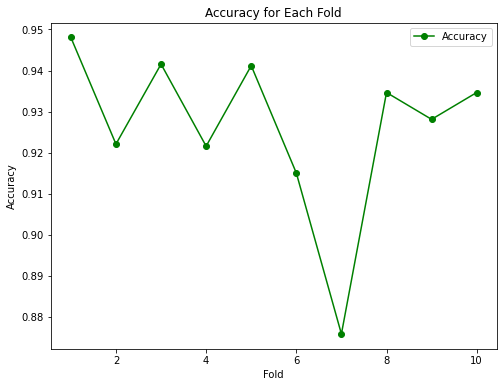

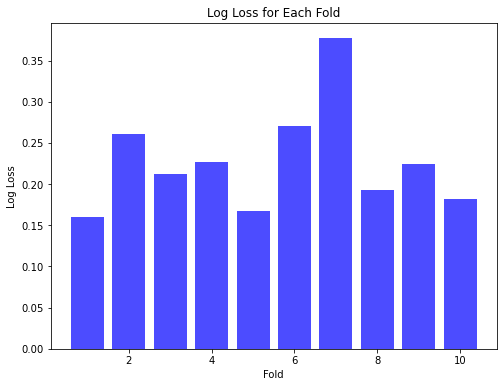


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.948052  0.992488  0.160306
1     2  0.922078  0.982384  0.260387
2     3  0.941558  0.986541  0.212024
3     4  0.921569  0.987156  0.226833
4     5  0.941176  0.994026  0.167016
5     6  0.915033  0.979532  0.270151
6     7  0.875817  0.976172  0.377125
7     8  0.934641  0.987682  0.192437
8     9  0.928105  0.979614  0.224171
9    10  0.934641  0.990379  0.181475
--------------------------------------------------


In [28]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model XGBoost
        xgb_classifier = XGBClassifier(random_state=42)

        # Melatih model
        xgb_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = xgb_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Visualisasi Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.show()

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = xgb_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        for i in range(xgb_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(xgb_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for XGBoost Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))
    print("--------------------------------------------------")
    
    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()
    
    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)
    print("--------------------------------------------------")


## AdaBoost FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.6710097719869706
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.80      0.60        88
           1       0.53      0.27      0.36       104
           2       0.98      0.94      0.96       115

    accuracy                           0.67       307
   macro avg       0.67      0.67      0.64       307
weighted avg       0.69      0.67      0.65       307



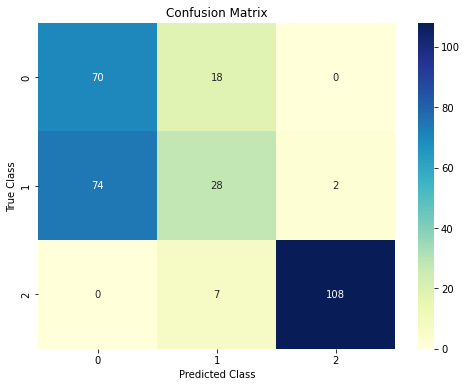

AUC Class 0: 0.71
AUC Class 1: 0.74
AUC Class 2: 1.00
Log Loss: 0.8706


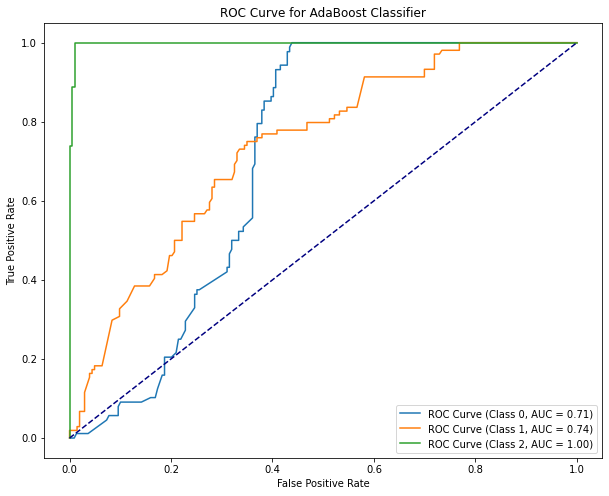


Accuracy: 0.6286644951140065
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.72      0.60       112
           1       0.39      0.19      0.26        99
           2       0.95      0.97      0.96        96

    accuracy                           0.63       307
   macro avg       0.61      0.63      0.60       307
weighted avg       0.61      0.63      0.60       307



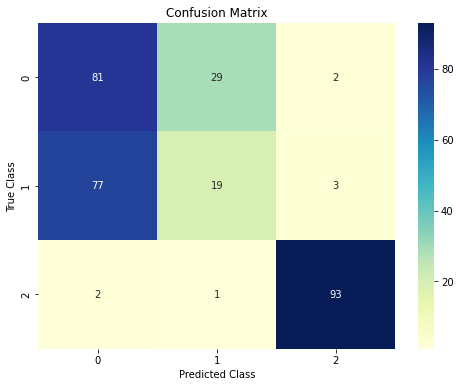

AUC Class 0: 0.69
AUC Class 1: 0.63
AUC Class 2: 0.99
Log Loss: 0.8708


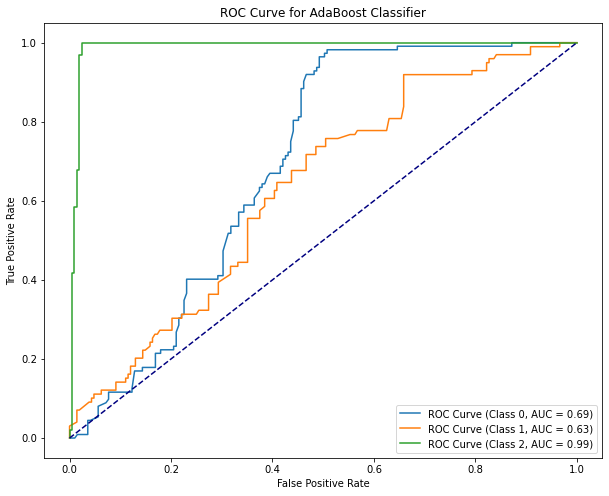


Accuracy: 0.5798045602605864
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.59      0.49        98
           1       0.44      0.25      0.32       115
           2       0.90      0.97      0.93        94

    accuracy                           0.58       307
   macro avg       0.58      0.60      0.58       307
weighted avg       0.57      0.58      0.56       307



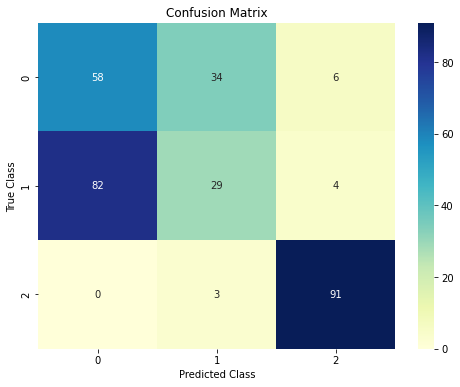

AUC Class 0: 0.69
AUC Class 1: 0.67
AUC Class 2: 0.98
Log Loss: 0.8635


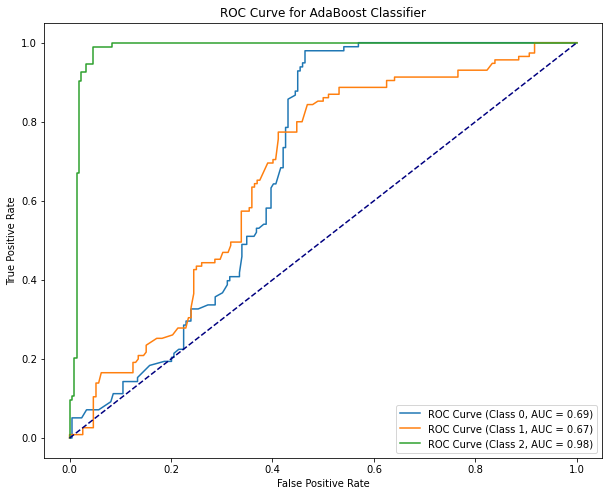


Accuracy: 0.6209150326797386
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.73      0.61       113
           1       0.42      0.22      0.29       104
           2       0.90      0.96      0.93        89

    accuracy                           0.62       306
   macro avg       0.61      0.63      0.61       306
weighted avg       0.60      0.62      0.59       306



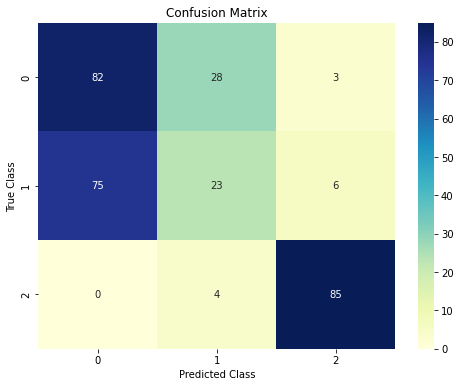

AUC Class 0: 0.68
AUC Class 1: 0.55
AUC Class 2: 0.99
Log Loss: 0.8077


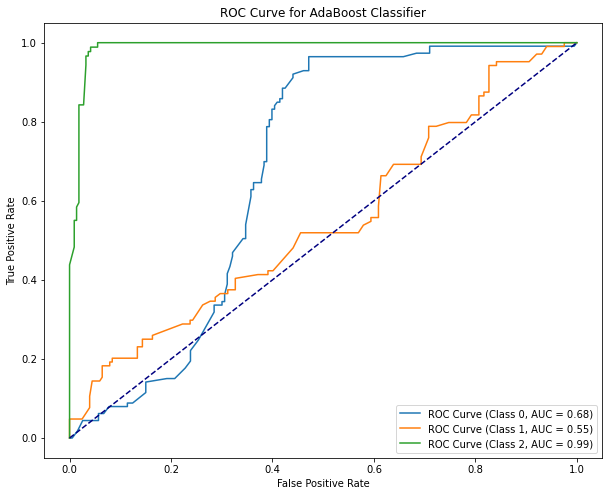


Accuracy: 0.6862745098039216
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.80      0.63       100
           1       0.44      0.18      0.26        89
           2       0.97      0.97      0.97       117

    accuracy                           0.69       306
   macro avg       0.65      0.65      0.62       306
weighted avg       0.67      0.69      0.65       306



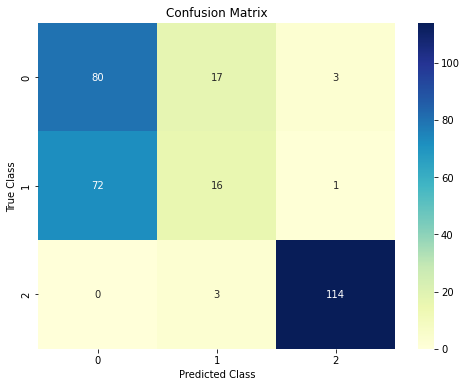

AUC Class 0: 0.74
AUC Class 1: 0.73
AUC Class 2: 0.99
Log Loss: 0.8610


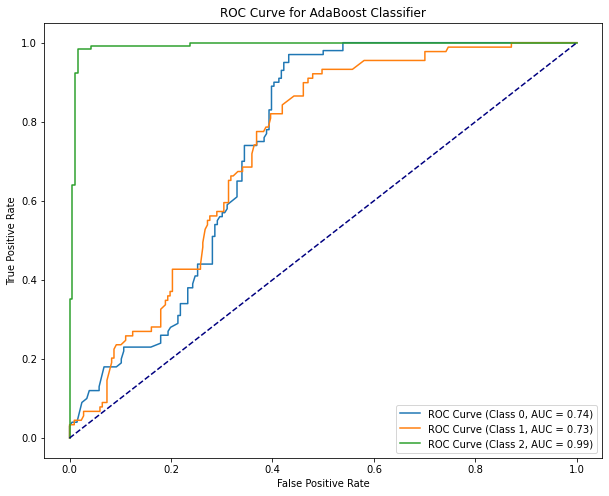


Average Accuracy for 5-fold: 0.6373336739690447
Average AUC for 5-fold: 0.785075897938634
Average Log Loss for 5-fold: 0.854710503267573
--------------------------------------------------


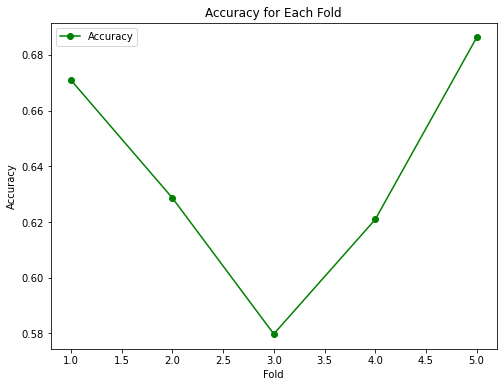

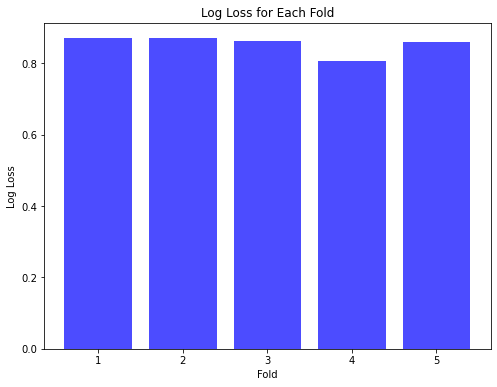


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.671010  0.813854  0.870643
1     2  0.628664  0.771361  0.870753
2     3  0.579805  0.780671  0.863454
3     4  0.620915  0.738397  0.807747
4     5  0.686275  0.821097  0.860955
--------------------------------------------------
KFold=10

Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.98      0.65        42
           1       0.92      0.20      0.33        55
           2       0.98      1.00      0.99        57

    accuracy                           0.71       154
   macro avg       0.80      0.73      0.66       154
weighted avg       0.82      0.71      0.66       154



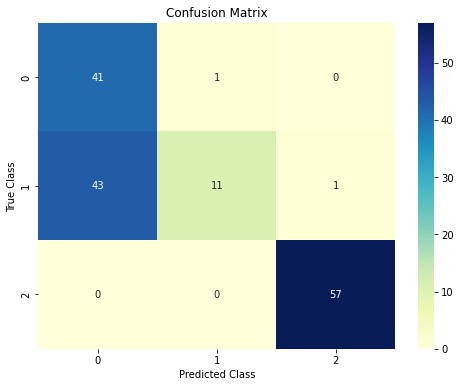

AUC Class 0: 0.69
AUC Class 1: 0.71
AUC Class 2: 1.00
Log Loss: 0.9018


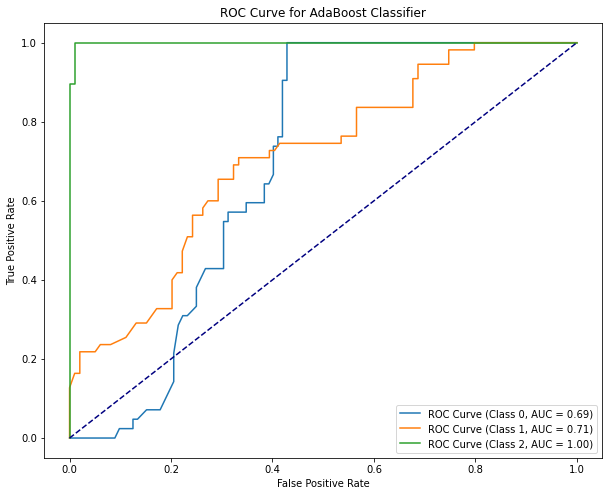


Accuracy: 0.6493506493506493
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.66      0.56        47
           1       0.43      0.27      0.33        49
           2       0.93      0.97      0.95        58

    accuracy                           0.65       154
   macro avg       0.62      0.63      0.61       154
weighted avg       0.64      0.65      0.63       154



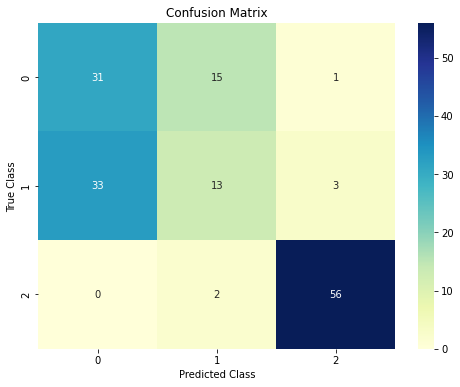

AUC Class 0: 0.73
AUC Class 1: 0.74
AUC Class 2: 0.99
Log Loss: 0.8892


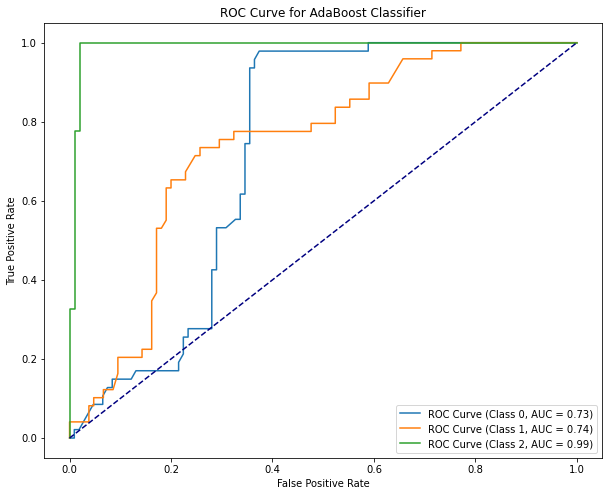


Accuracy: 0.6363636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.78      0.61        54
           1       0.38      0.16      0.22        51
           2       0.96      0.98      0.97        49

    accuracy                           0.64       154
   macro avg       0.62      0.64      0.60       154
weighted avg       0.61      0.64      0.60       154



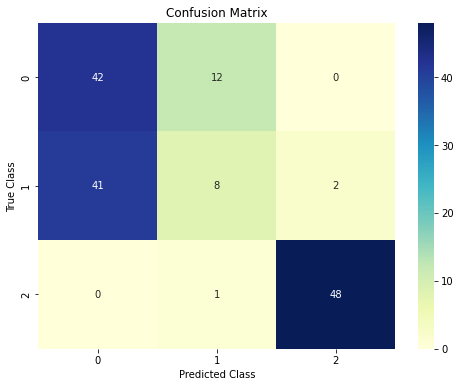

AUC Class 0: 0.71
AUC Class 1: 0.68
AUC Class 2: 1.00
Log Loss: 0.8887


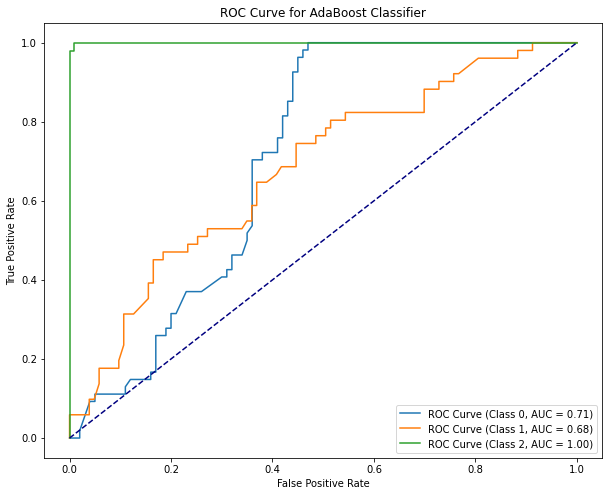


Accuracy: 0.673202614379085
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.89      0.67        57
           1       0.50      0.10      0.17        49
           2       0.98      1.00      0.99        47

    accuracy                           0.67       153
   macro avg       0.67      0.67      0.61       153
weighted avg       0.66      0.67      0.61       153



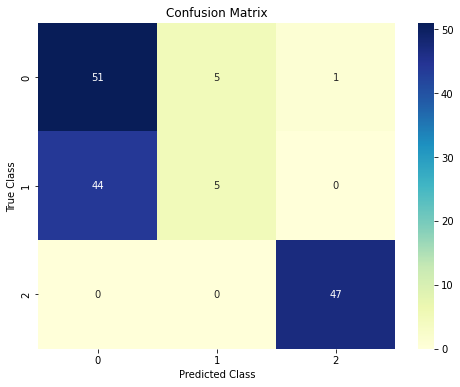

AUC Class 0: 0.61
AUC Class 1: 0.69
AUC Class 2: 0.99
Log Loss: 0.8972


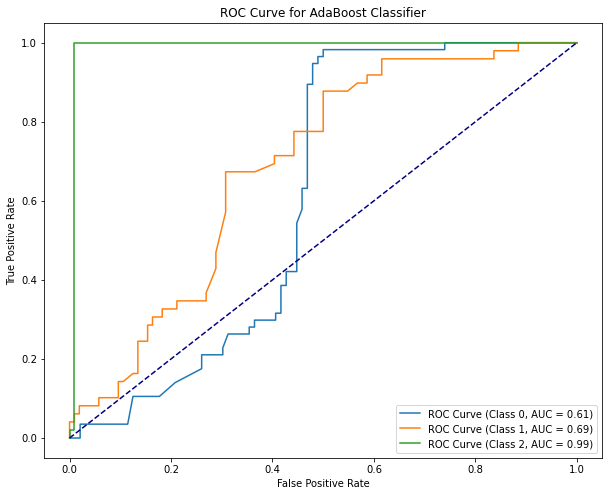


Accuracy: 0.6274509803921569
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.68      0.54        47
           1       0.62      0.32      0.43        62
           2       0.88      1.00      0.94        44

    accuracy                           0.63       153
   macro avg       0.65      0.67      0.63       153
weighted avg       0.64      0.63      0.61       153



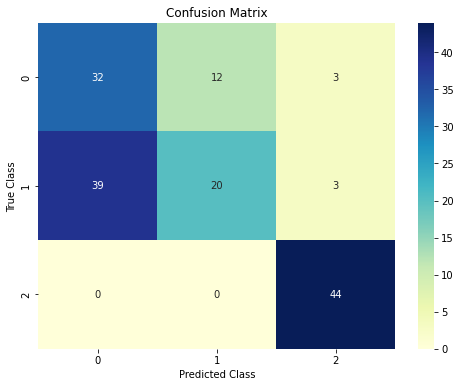

AUC Class 0: 0.68
AUC Class 1: 0.76
AUC Class 2: 0.99
Log Loss: 0.8781


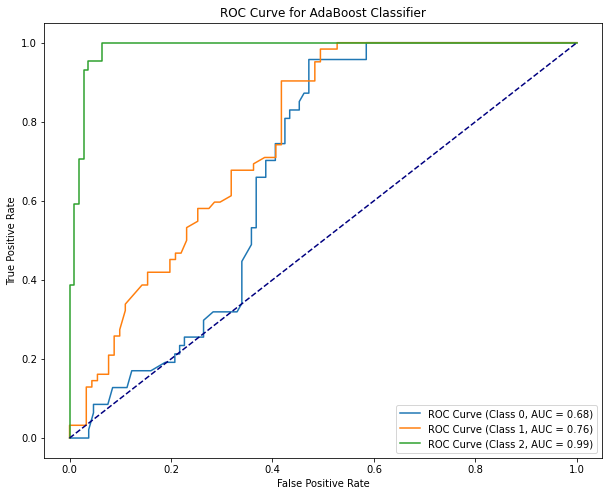


Accuracy: 0.6862745098039216
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.82      0.66        51
           1       0.62      0.29      0.39        52
           2       0.92      0.96      0.94        50

    accuracy                           0.69       153
   macro avg       0.70      0.69      0.66       153
weighted avg       0.70      0.69      0.66       153



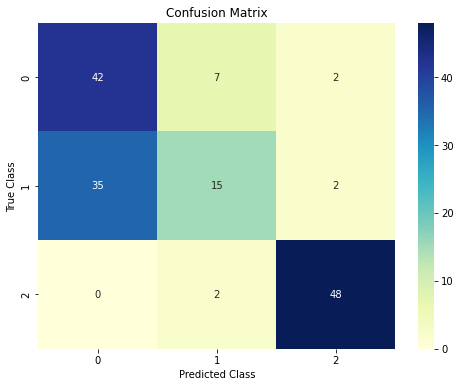

AUC Class 0: 0.71
AUC Class 1: 0.71
AUC Class 2: 0.99
Log Loss: 0.8676


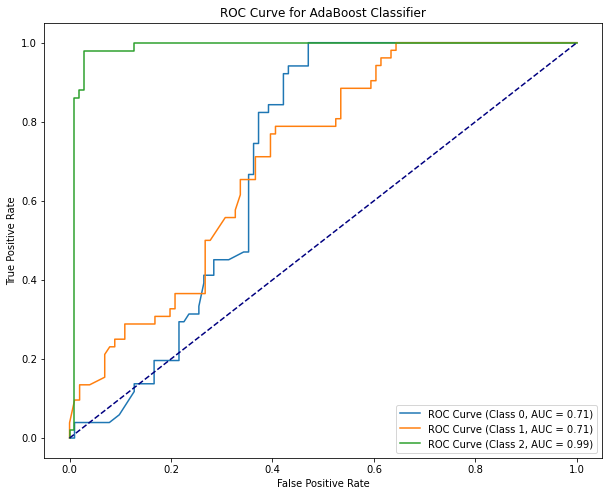


Accuracy: 0.6339869281045751
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.86      0.69        64
           1       0.53      0.15      0.24        53
           2       0.81      0.94      0.87        36

    accuracy                           0.63       153
   macro avg       0.64      0.65      0.60       153
weighted avg       0.61      0.63      0.57       153



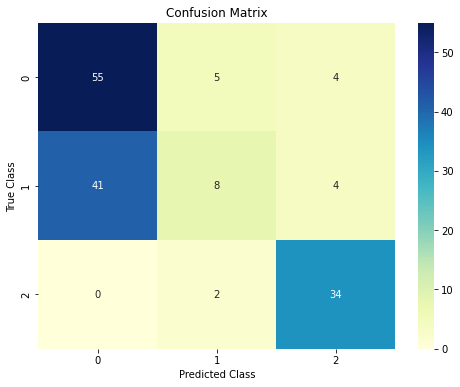

AUC Class 0: 0.65
AUC Class 1: 0.46
AUC Class 2: 0.98
Log Loss: 0.8377


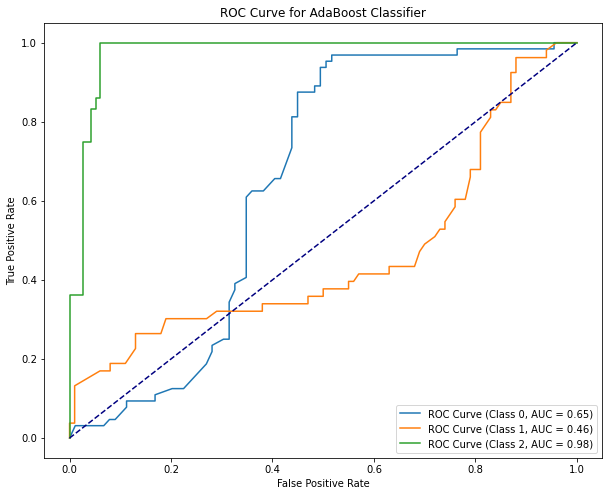


Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.84      0.63        49
           1       0.50      0.18      0.26        51
           2       0.98      0.98      0.98        53

    accuracy                           0.67       153
   macro avg       0.66      0.66      0.62       153
weighted avg       0.67      0.67      0.63       153



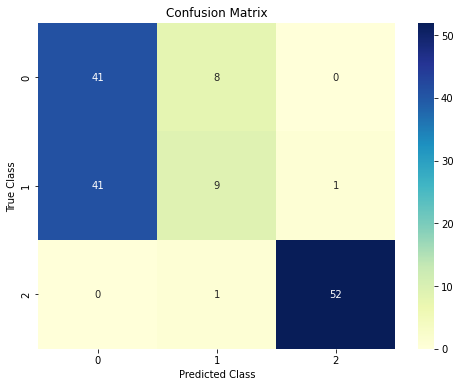

AUC Class 0: 0.68
AUC Class 1: 0.76
AUC Class 2: 1.00
Log Loss: 0.8927


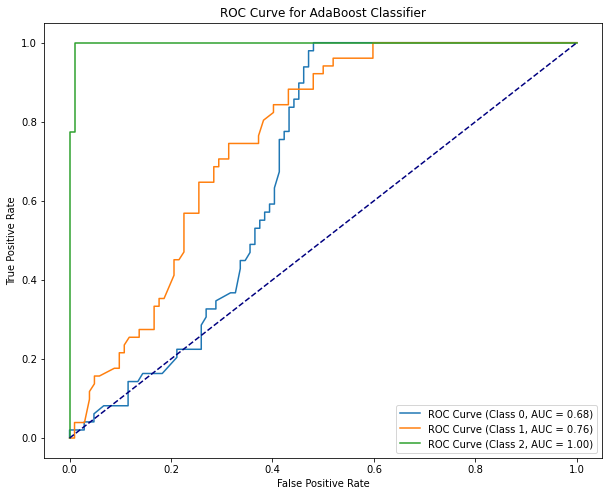


Accuracy: 0.673202614379085
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.74      0.60        47
           1       0.23      0.08      0.12        39
           2       0.93      0.97      0.95        67

    accuracy                           0.67       153
   macro avg       0.55      0.60      0.55       153
weighted avg       0.62      0.67      0.63       153



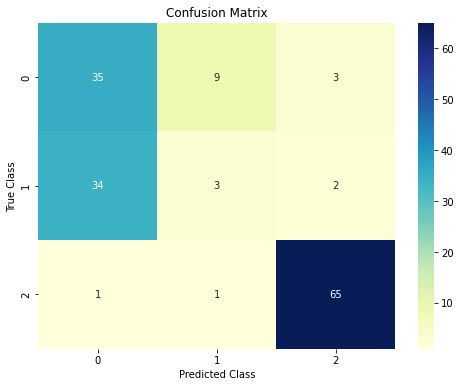

AUC Class 0: 0.73
AUC Class 1: 0.77
AUC Class 2: 0.98
Log Loss: 0.9001


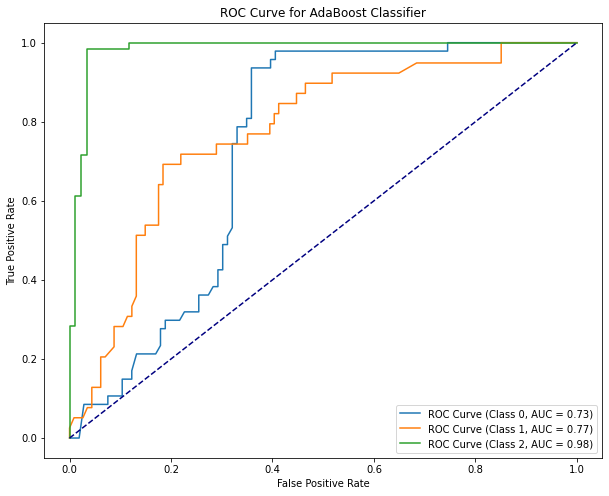


Accuracy: 0.6013071895424836
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.64      0.53        53
           1       0.33      0.18      0.23        50
           2       0.96      0.98      0.97        50

    accuracy                           0.60       153
   macro avg       0.58      0.60      0.58       153
weighted avg       0.58      0.60      0.58       153



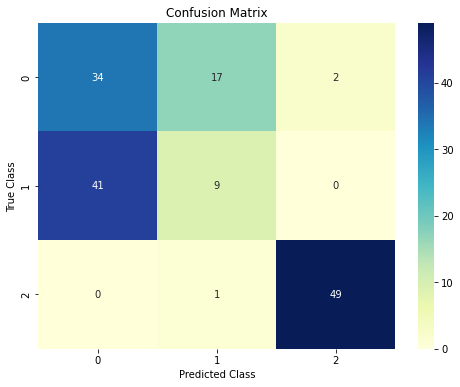

AUC Class 0: 0.70
AUC Class 1: 0.72
AUC Class 2: 0.99
Log Loss: 0.8518


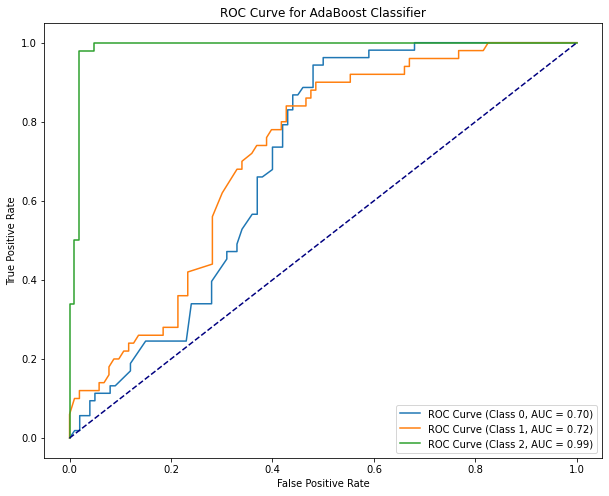


Average Accuracy for 10-fold: 0.6555597996774467
Average AUC for 10-fold: 0.7927778557459808
Average Log Loss for 10-fold: 0.8804826314293474
--------------------------------------------------


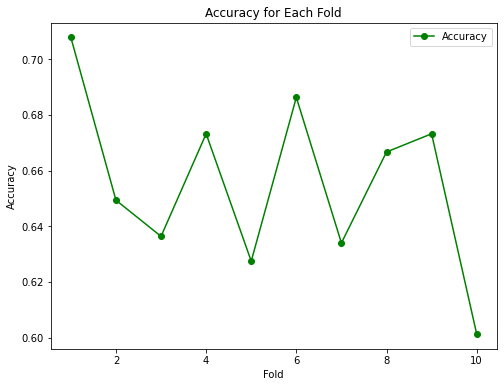

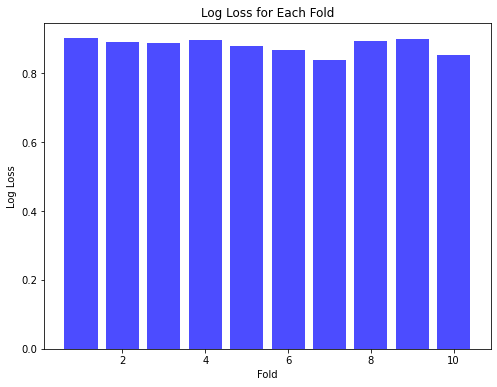


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.707792  0.800571  0.901793
1     2  0.649351  0.819573  0.889228
2     3  0.636364  0.795787  0.888668
3     4  0.673203  0.764296  0.897231
4     5  0.627451  0.808521  0.878088
5     6  0.686275  0.801720  0.867554
6     7  0.633987  0.694984  0.837668
7     8  0.666667  0.811237  0.892670
8     9  0.673203  0.830230  0.900107
9    10  0.601307  0.800861  0.851819
--------------------------------------------------


In [29]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []  # Initialize fold_log_losses inside the loop

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model AdaBoost dengan Decision Tree Classifier sebagai base estimator
        ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

        # Melatih model
        ada_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = ada_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Visualisasi Confusion Matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_mat, annot=True, fmt=".0f", cmap="YlGnBu")
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Class")
        plt.ylabel("True Class")
        plt.show()

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = ada_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        for i in range(ada_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(ada_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for AdaBoost Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))
    print("--------------------------------------------------")

    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()

    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)
    print("--------------------------------------------------")


## GradientBoostingClasifire FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.8045602605863192
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        88
           1       0.74      0.64      0.69       104
           2       0.93      1.00      0.96       115

    accuracy                           0.80       307
   macro avg       0.79      0.79      0.79       307
weighted avg       0.80      0.80      0.80       307

AUC Class 0: 0.91
AUC Class 1: 0.88
AUC Class 2: 0.99
Log Loss: 0.4640


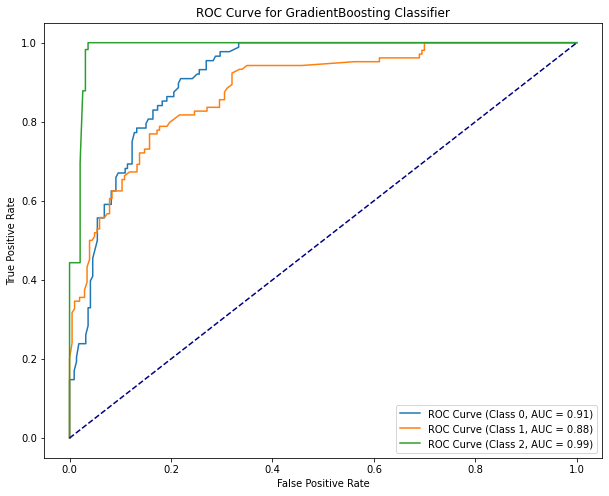


Accuracy: 0.8045602605863192
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.67      0.72       112
           1       0.68      0.77      0.72        99
           2       0.95      1.00      0.97        96

    accuracy                           0.80       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.80      0.80       307

AUC Class 0: 0.89
AUC Class 1: 0.88
AUC Class 2: 1.00
Log Loss: 0.4818


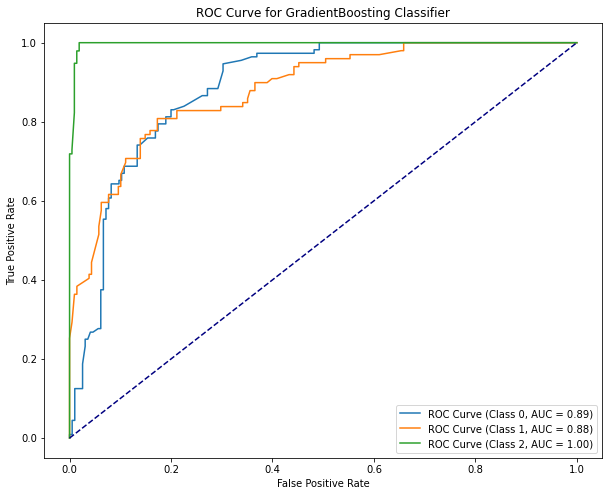


Accuracy: 0.755700325732899
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.67        98
           1       0.71      0.65      0.68       115
           2       0.84      1.00      0.91        94

    accuracy                           0.76       307
   macro avg       0.75      0.77      0.76       307
weighted avg       0.75      0.76      0.75       307

AUC Class 0: 0.87
AUC Class 1: 0.84
AUC Class 2: 0.98
Log Loss: 0.5518


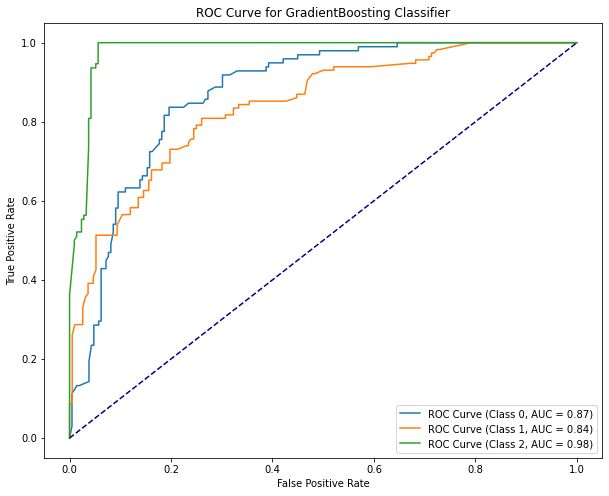


Accuracy: 0.8137254901960784
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       113
           1       0.77      0.72      0.74       104
           2       0.88      1.00      0.94        89

    accuracy                           0.81       306
   macro avg       0.81      0.82      0.82       306
weighted avg       0.81      0.81      0.81       306

AUC Class 0: 0.88
AUC Class 1: 0.87
AUC Class 2: 0.98
Log Loss: 0.5254


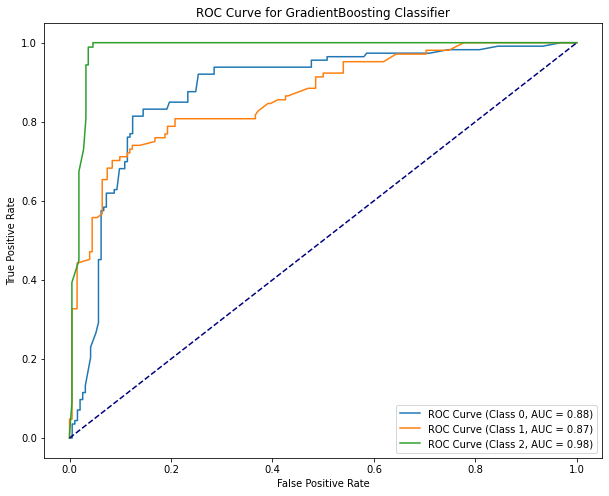


Accuracy: 0.8235294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       100
           1       0.70      0.74      0.72        89
           2       0.95      0.99      0.97       117

    accuracy                           0.82       306
   macro avg       0.81      0.81      0.81       306
weighted avg       0.82      0.82      0.82       306

AUC Class 0: 0.91
AUC Class 1: 0.89
AUC Class 2: 0.99
Log Loss: 0.4626


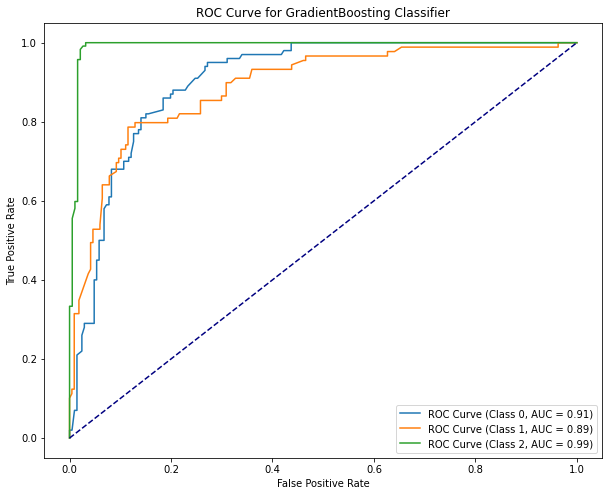


Average Accuracy for 5-fold: 0.8004151497732643
Average AUC for 5-fold: 0.9170298335896143
Average Log Loss for 5-fold: 0.49711229982579175


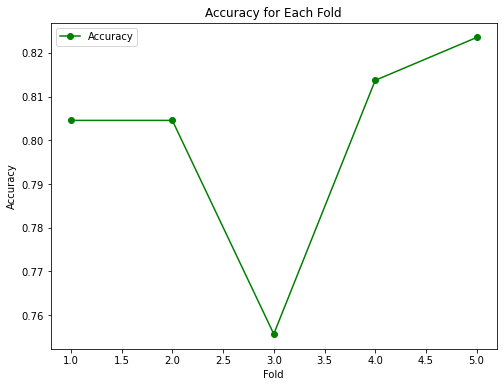

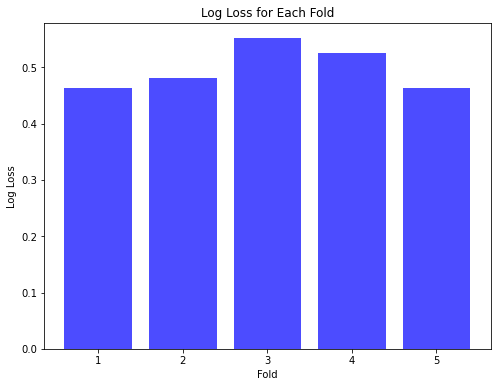


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.804560  0.926888  0.463975
1     2  0.804560  0.922092  0.481786
2     3  0.755700  0.897454  0.551806
3     4  0.813725  0.910213  0.525390
4     5  0.823529  0.928501  0.462605
--------------------------------------------------
KFold=10

Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74        42
           1       0.80      0.65      0.72        55
           2       0.92      1.00      0.96        57

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.81       154

AUC Class 0: 0.92
AUC Class 1: 0.89
AUC Class 2: 0.99
Log Loss: 0.4555


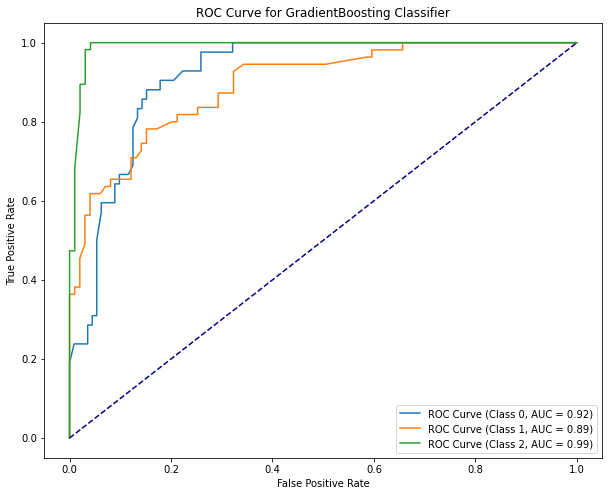


Accuracy: 0.8181818181818182
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        47
           1       0.72      0.69      0.71        49
           2       0.94      1.00      0.97        58

    accuracy                           0.82       154
   macro avg       0.80      0.81      0.80       154
weighted avg       0.81      0.82      0.82       154

AUC Class 0: 0.90
AUC Class 1: 0.87
AUC Class 2: 0.99
Log Loss: 0.4753


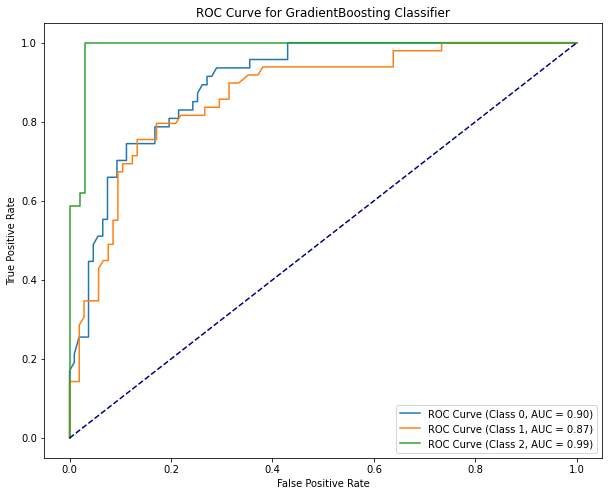


Accuracy: 0.7922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71        54
           1       0.69      0.73      0.70        51
           2       0.94      1.00      0.97        49

    accuracy                           0.79       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.79      0.79      0.79       154

AUC Class 0: 0.89
AUC Class 1: 0.87
AUC Class 2: 1.00
Log Loss: 0.4758


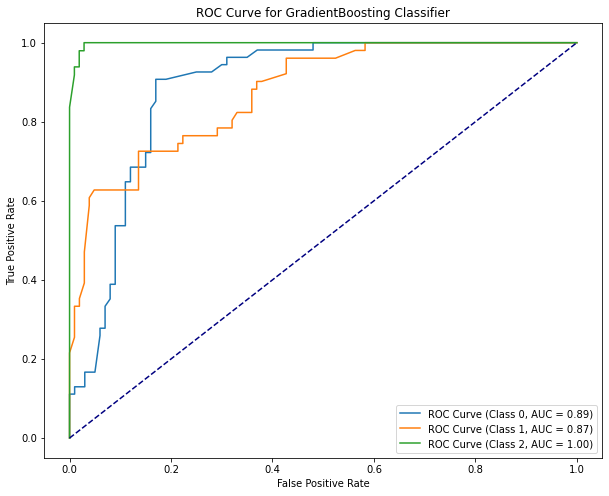


Accuracy: 0.803921568627451
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.65      0.72        57
           1       0.67      0.80      0.73        49
           2       0.96      1.00      0.98        47

    accuracy                           0.80       153
   macro avg       0.81      0.82      0.81       153
weighted avg       0.81      0.80      0.80       153

AUC Class 0: 0.89
AUC Class 1: 0.89
AUC Class 2: 1.00
Log Loss: 0.4915


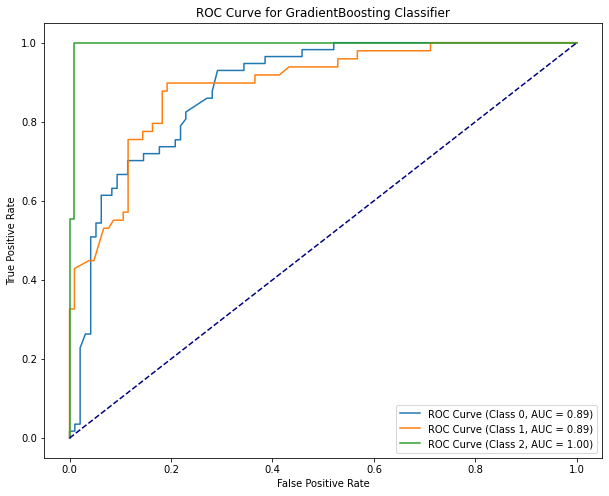


Accuracy: 0.7450980392156863
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.67        47
           1       0.76      0.61      0.68        62
           2       0.81      1.00      0.90        44

    accuracy                           0.75       153
   macro avg       0.74      0.76      0.75       153
weighted avg       0.74      0.75      0.74       153

AUC Class 0: 0.86
AUC Class 1: 0.82
AUC Class 2: 0.96
Log Loss: 0.5973


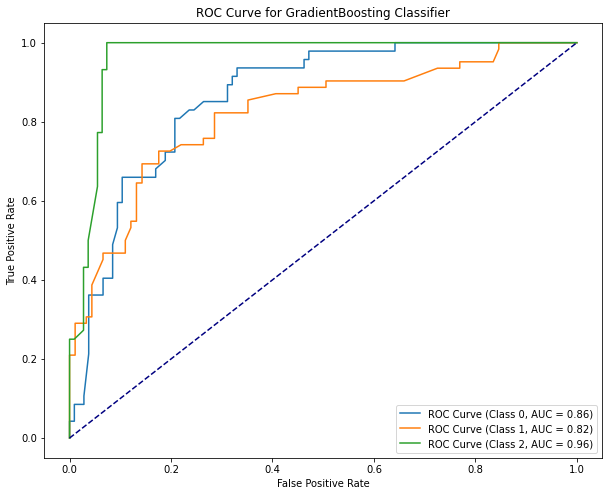


Accuracy: 0.7843137254901961
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.59      0.66        51
           1       0.67      0.77      0.71        52
           2       0.94      1.00      0.97        50

    accuracy                           0.78       153
   macro avg       0.79      0.79      0.78       153
weighted avg       0.78      0.78      0.78       153

AUC Class 0: 0.88
AUC Class 1: 0.87
AUC Class 2: 0.99
Log Loss: 0.5055


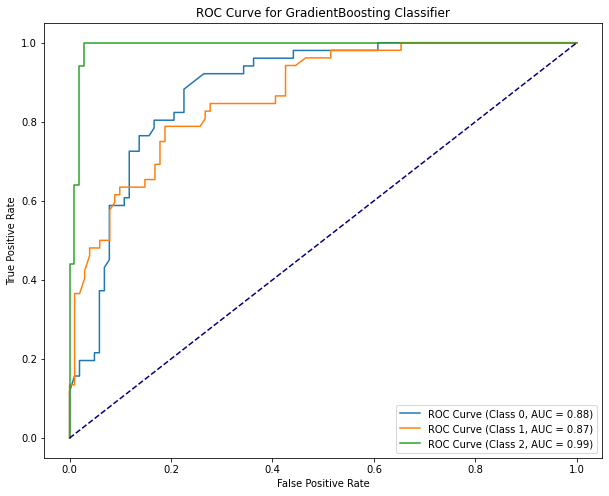


Accuracy: 0.8104575163398693
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        64
           1       0.78      0.72      0.75        53
           2       0.82      1.00      0.90        36

    accuracy                           0.81       153
   macro avg       0.81      0.83      0.82       153
weighted avg       0.81      0.81      0.81       153

AUC Class 0: 0.89
AUC Class 1: 0.87
AUC Class 2: 0.98
Log Loss: 0.5383


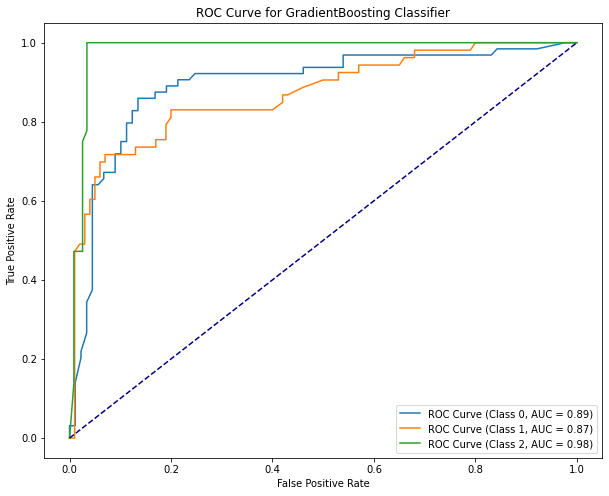


Accuracy: 0.8235294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74        49
           1       0.77      0.73      0.75        51
           2       0.93      1.00      0.96        53

    accuracy                           0.82       153
   macro avg       0.82      0.82      0.82       153
weighted avg       0.82      0.82      0.82       153

AUC Class 0: 0.88
AUC Class 1: 0.87
AUC Class 2: 0.99
Log Loss: 0.5086


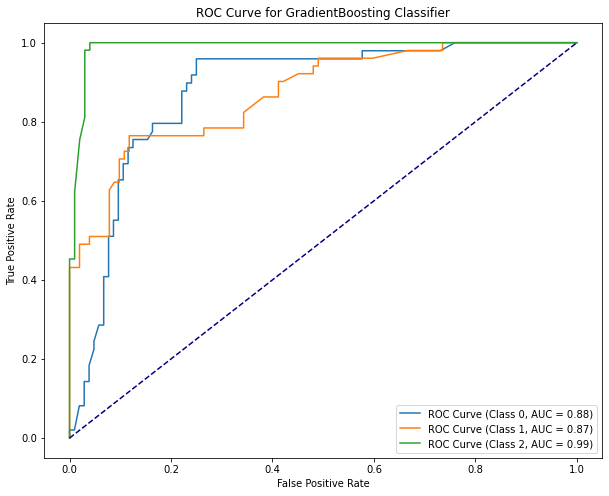


Accuracy: 0.8300653594771242
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.73        47
           1       0.68      0.69      0.68        39
           2       0.96      1.00      0.98        67

    accuracy                           0.83       153
   macro avg       0.80      0.80      0.80       153
weighted avg       0.83      0.83      0.83       153

AUC Class 0: 0.93
AUC Class 1: 0.89
AUC Class 2: 0.99
Log Loss: 0.4413


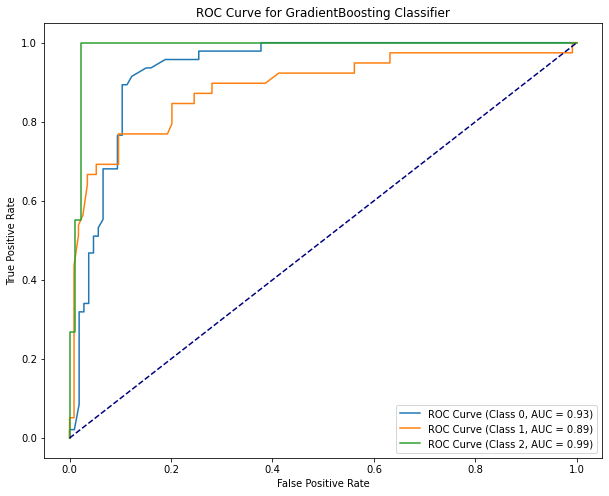


Accuracy: 0.7973856209150327
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71        53
           1       0.69      0.76      0.72        50
           2       0.94      0.98      0.96        50

    accuracy                           0.80       153
   macro avg       0.80      0.80      0.80       153
weighted avg       0.80      0.80      0.80       153

AUC Class 0: 0.88
AUC Class 1: 0.88
AUC Class 2: 1.00
Log Loss: 0.4840


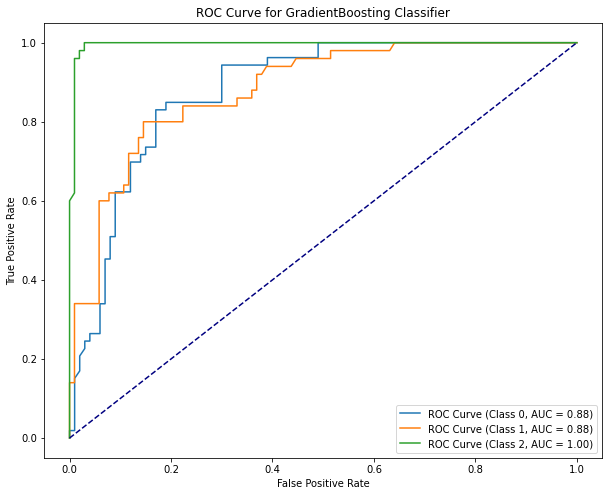


Average Accuracy for 10-fold: 0.8023342670401494
Average AUC for 10-fold: 0.9175767312144434
Average Log Loss for 10-fold: 0.497307272839494


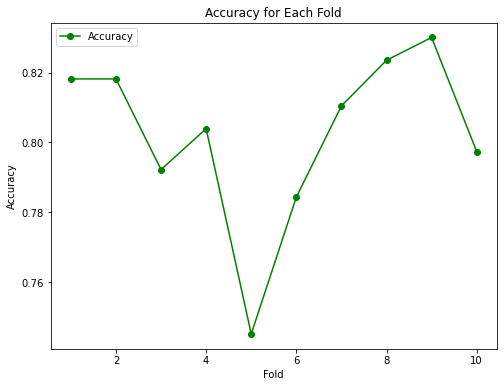

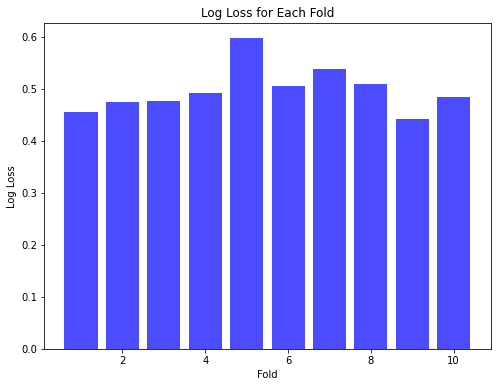


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.818182  0.934094  0.455545
1     2  0.818182  0.918477  0.475265
2     3  0.792208  0.920065  0.475756
3     4  0.803922  0.924149  0.491524
4     5  0.745098  0.882852  0.597305
5     6  0.784314  0.913824  0.505517
6     7  0.810458  0.914766  0.538284
7     8  0.823529  0.912930  0.508625
8     9  0.830065  0.935391  0.441264
9    10  0.797386  0.919220  0.483988
--------------------------------------------------


In [30]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []  # Initialize fold_log_losses inside the loop

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model GradientBoostingClassifier
        gradient_boosting_classifier = GradientBoostingClassifier(max_depth=1, random_state=42)

        # Melatih model
        gradient_boosting_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = gradient_boosting_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = gradient_boosting_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        for i in range(gradient_boosting_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {label_encoder.classes_[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(gradient_boosting_classifier.n_classes_):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {label_encoder.classes_[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for GradientBoosting Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))
    
    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()
    
    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)
    print("--------------------------------------------------")


## CatBoosting FOLD 5 dan 10 SMOTE

KFold=5

Accuracy: 0.9381107491856677
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        88
           1       0.92      0.89      0.91       104
           2       0.98      1.00      0.99       115

    accuracy                           0.94       307
   macro avg       0.93      0.93      0.93       307
weighted avg       0.94      0.94      0.94       307

AUC Class 0: 0.98
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.1896


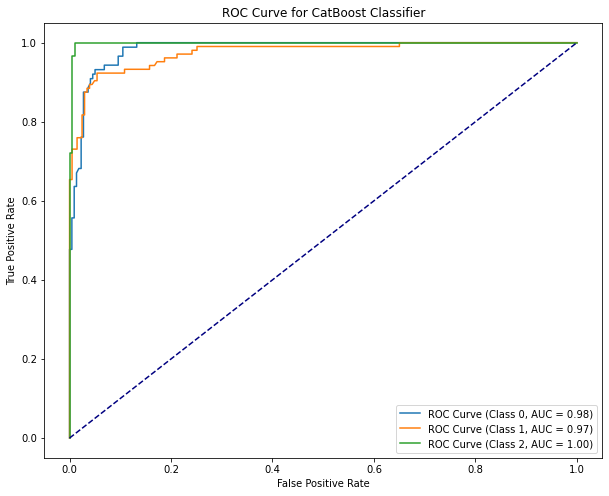


Accuracy: 0.9185667752442996
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.89       112
           1       0.88      0.89      0.88        99
           2       0.96      1.00      0.98        96

    accuracy                           0.92       307
   macro avg       0.92      0.92      0.92       307
weighted avg       0.92      0.92      0.92       307

AUC Class 0: 0.97
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2509


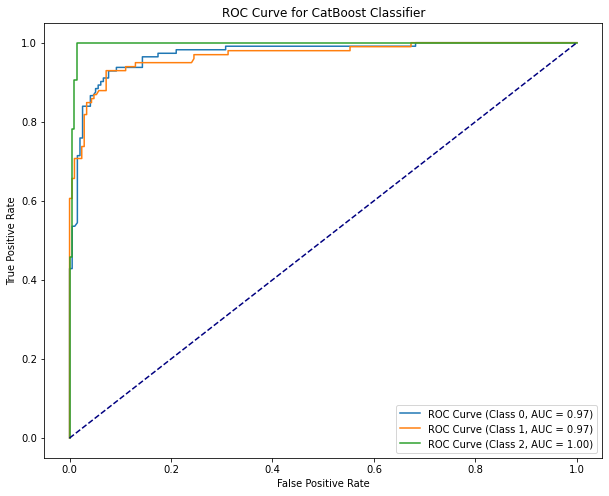


Accuracy: 0.9315960912052117
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        98
           1       0.94      0.88      0.91       115
           2       0.96      1.00      0.98        94

    accuracy                           0.93       307
   macro avg       0.93      0.94      0.93       307
weighted avg       0.93      0.93      0.93       307

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1916


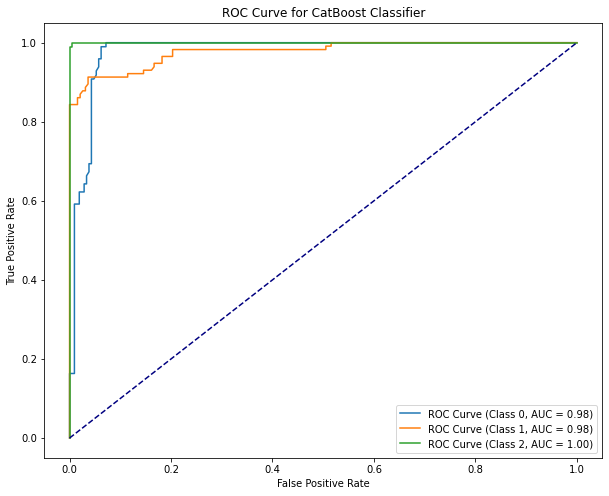


Accuracy: 0.9019607843137255
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       113
           1       0.85      0.88      0.86       104
           2       0.98      0.98      0.98        89

    accuracy                           0.90       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.90      0.90      0.90       306

AUC Class 0: 0.97
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2413


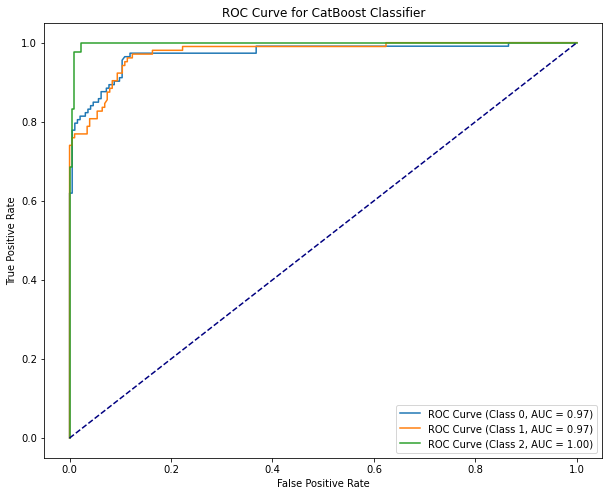


Accuracy: 0.9215686274509803
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       100
           1       0.89      0.84      0.87        89
           2       0.97      1.00      0.99       117

    accuracy                           0.92       306
   macro avg       0.92      0.91      0.92       306
weighted avg       0.92      0.92      0.92       306

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1802


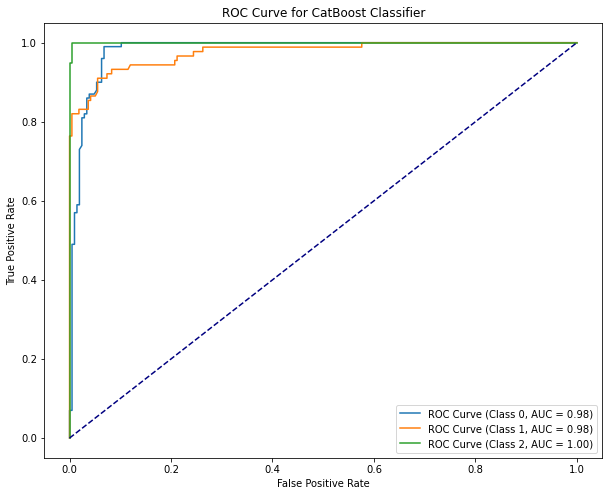


Average Accuracy for 5-fold: 0.922360605479977
Average AUC for 5-fold: 0.9832864711858553
Average Log Loss for 5-fold: 0.21071877415847845


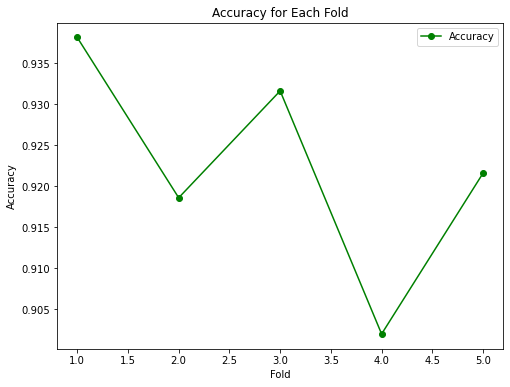

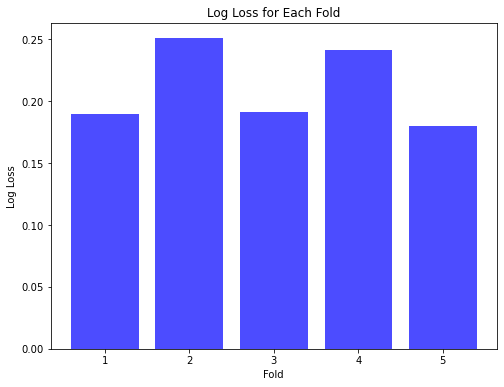


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.938111  0.985763  0.189601
1     2  0.918567  0.978306  0.250926
2     3  0.931596  0.985207  0.191561
3     4  0.901961  0.981375  0.241326
4     5  0.921569  0.985781  0.180179
--------------------------------------------------
KFold=10

Accuracy: 0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.93      0.95      0.94        55
           2       0.98      1.00      0.99        57

    accuracy                           0.95       154
   macro avg       0.95      0.95      0.95       154
weighted avg       0.95      0.95      0.95       154

AUC Class 0: 0.99
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1319


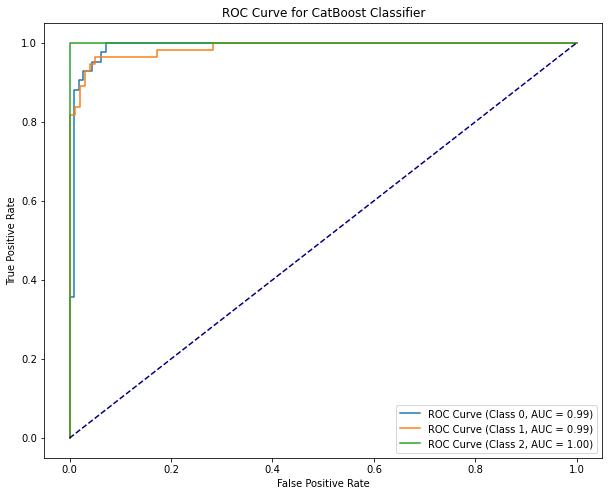


Accuracy: 0.922077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        47
           1       0.88      0.88      0.88        49
           2       0.98      1.00      0.99        58

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154

AUC Class 0: 0.98
AUC Class 1: 0.96
AUC Class 2: 1.00
Log Loss: 0.2448


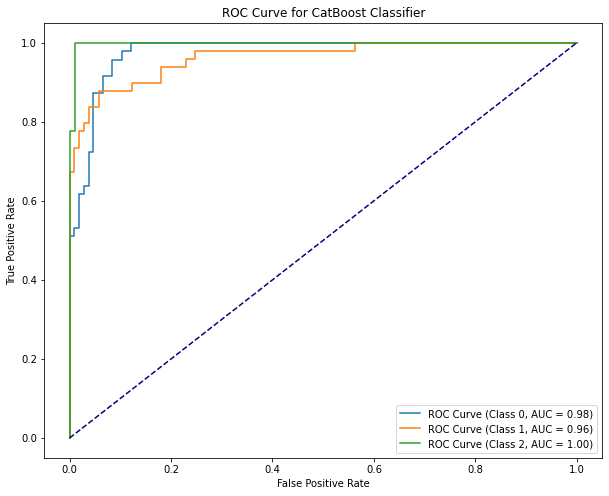


Accuracy: 0.935064935064935
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.89      0.92      0.90        51
           2       0.96      1.00      0.98        49

    accuracy                           0.94       154
   macro avg       0.94      0.94      0.94       154
weighted avg       0.94      0.94      0.93       154

AUC Class 0: 0.99
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2076


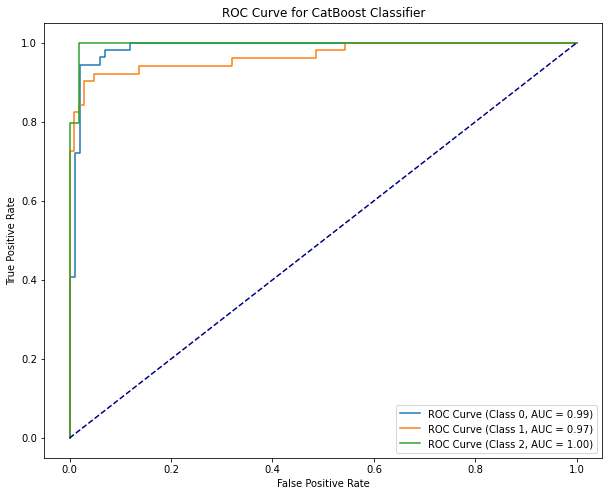


Accuracy: 0.9084967320261438
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87        57
           1       0.86      0.90      0.88        49
           2       0.96      1.00      0.98        47

    accuracy                           0.91       153
   macro avg       0.91      0.91      0.91       153
weighted avg       0.91      0.91      0.91       153

AUC Class 0: 0.96
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2665


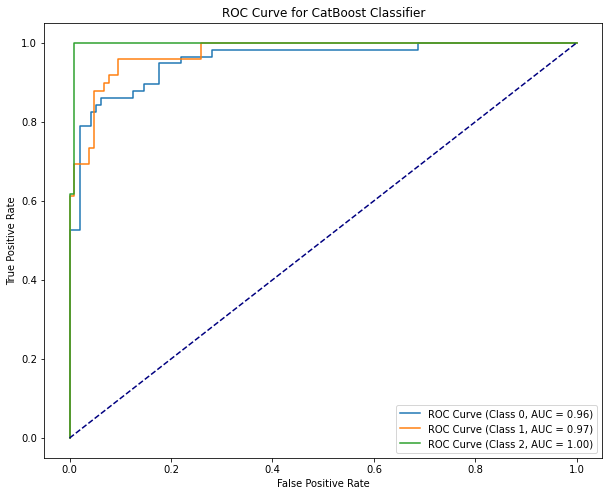


Accuracy: 0.9607843137254902
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.94      0.95        62
           2       0.98      1.00      0.99        44

    accuracy                           0.96       153
   macro avg       0.96      0.96      0.96       153
weighted avg       0.96      0.96      0.96       153

AUC Class 0: 0.99
AUC Class 1: 0.99
AUC Class 2: 1.00
Log Loss: 0.1463


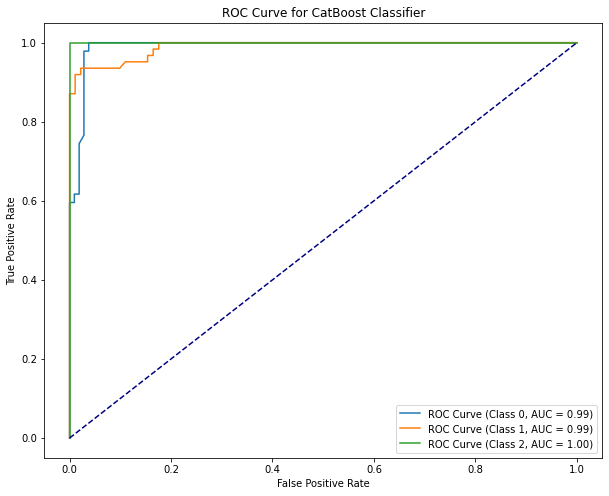


Accuracy: 0.9215686274509803
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.89        51
           1       0.94      0.85      0.89        52
           2       0.98      1.00      0.99        50

    accuracy                           0.92       153
   macro avg       0.92      0.92      0.92       153
weighted avg       0.92      0.92      0.92       153

AUC Class 0: 0.97
AUC Class 1: 0.96
AUC Class 2: 1.00
Log Loss: 0.2229


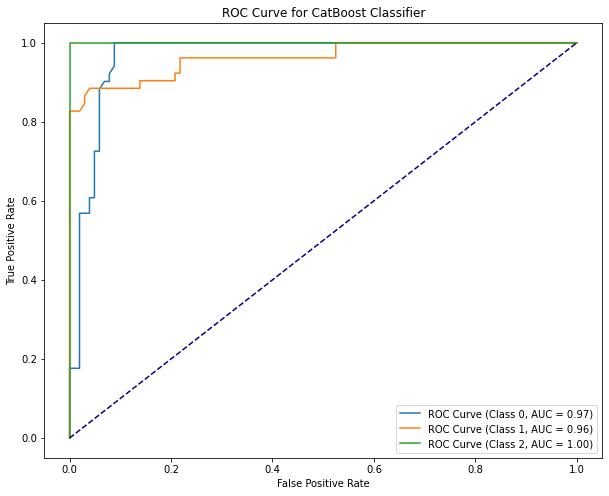


Accuracy: 0.8823529411764706
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        64
           1       0.83      0.85      0.84        53
           2       0.95      1.00      0.97        36

    accuracy                           0.88       153
   macro avg       0.89      0.90      0.89       153
weighted avg       0.88      0.88      0.88       153

AUC Class 0: 0.96
AUC Class 1: 0.97
AUC Class 2: 1.00
Log Loss: 0.2768


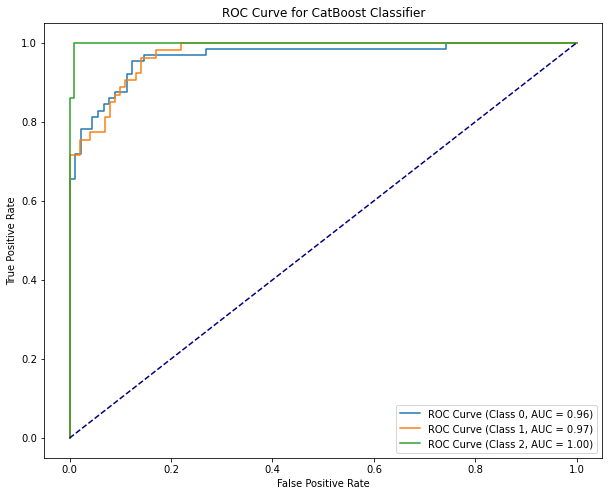


Accuracy: 0.9281045751633987
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        49
           1       0.92      0.86      0.89        51
           2       0.98      0.98      0.98        53

    accuracy                           0.93       153
   macro avg       0.93      0.93      0.93       153
weighted avg       0.93      0.93      0.93       153

AUC Class 0: 0.99
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1933


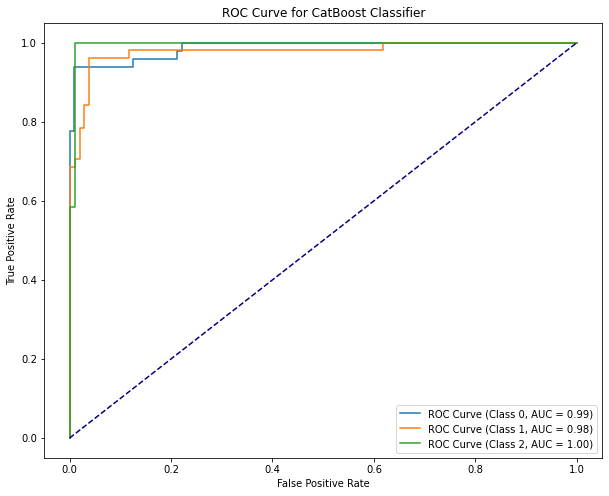


Accuracy: 0.9150326797385621
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.88      0.77      0.82        39
           2       0.99      1.00      0.99        67

    accuracy                           0.92       153
   macro avg       0.90      0.89      0.90       153
weighted avg       0.92      0.92      0.91       153

AUC Class 0: 0.97
AUC Class 1: 0.96
AUC Class 2: 1.00
Log Loss: 0.2175


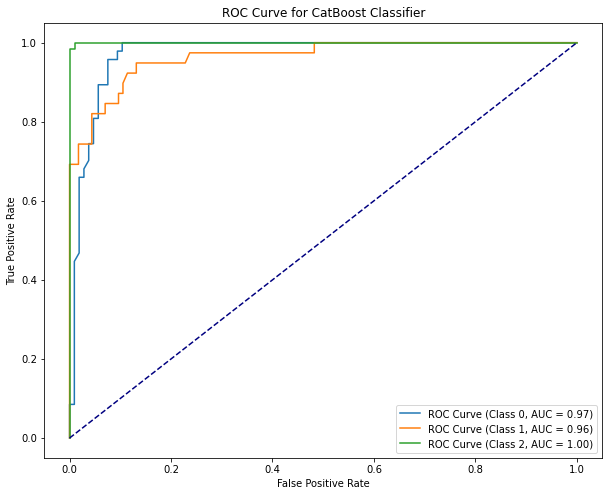


Accuracy: 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.92      0.90      0.91        50
           2       1.00      1.00      1.00        50

    accuracy                           0.94       153
   macro avg       0.94      0.94      0.94       153
weighted avg       0.94      0.94      0.94       153

AUC Class 0: 0.98
AUC Class 1: 0.98
AUC Class 2: 1.00
Log Loss: 0.1658


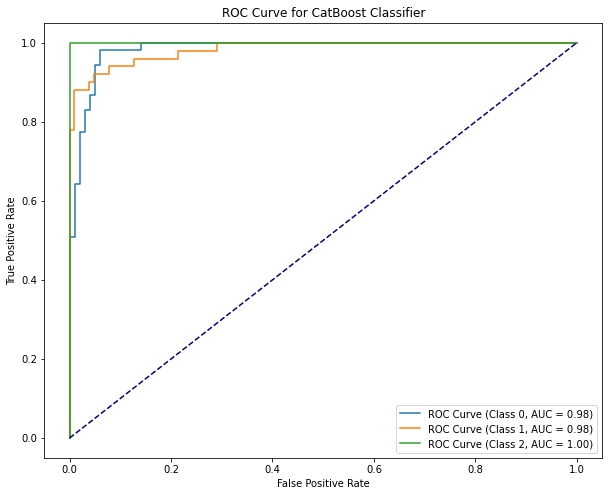


Average Accuracy for 10-fold: 0.9269204651557594
Average AUC for 10-fold: 0.9833453748850284
Average Log Loss for 10-fold: 0.20735126970046797


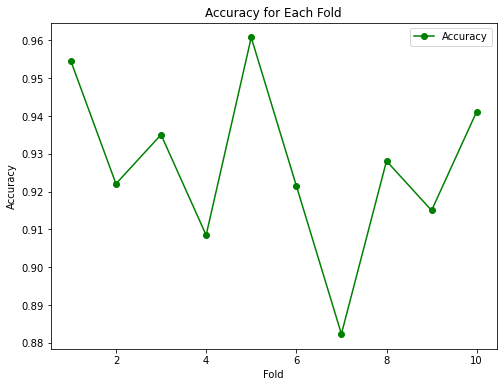

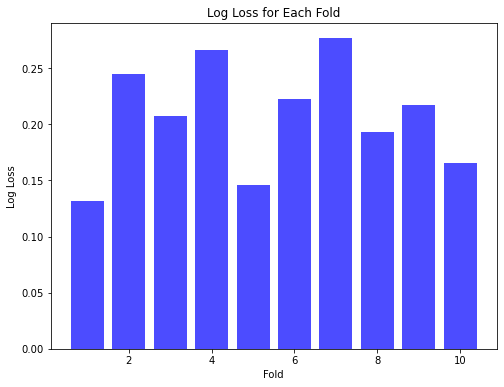


Fold Summary:
   Fold  Accuracy       AUC  Log Loss
0     1  0.954545  0.992568  0.131909
1     2  0.922078  0.979024  0.244848
2     3  0.935065  0.983589  0.207609
3     4  0.908497  0.975280  0.266453
4     5  0.960784  0.993173  0.146275
5     6  0.921569  0.976410  0.222899
6     7  0.882353  0.978533  0.276849
7     8  0.928105  0.986802  0.193314
8     9  0.915033  0.978989  0.217545
9    10  0.941176  0.989086  0.165810
--------------------------------------------------


In [31]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of KFolds
kfolds = [5, 10]

for kfold in kfolds:
    print(f"KFold={kfold}")
    kfold_cv = KFold(n_splits=kfold, shuffle=True, random_state=42)

    # Encoding string labels to integer labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_resampled)

    fold_accuracies = []
    fold_auc_scores = []
    fold_log_losses = []

    for train_index, val_index in kfold_cv.split(X_resampled):
        X_train_kfold, X_val_kfold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_kfold, y_val_kfold = y_encoded[train_index], y_encoded[val_index]

        # Membuat model CatBoost
        catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

        # Melatih model
        catboost_classifier.fit(X_train_kfold, y_train_kfold)

        # Melakukan prediksi pada data validasi
        y_pred = catboost_classifier.predict(X_val_kfold)

        # Evaluasi model
        accuracy = accuracy_score(y_val_kfold, y_pred)
        report = classification_report(y_val_kfold, y_pred)
        confusion_mat = confusion_matrix(y_val_kfold, y_pred)

        print("\nAccuracy:", accuracy)
        print("Classification Report:\n", report)

        # Menghitung probabilitas prediksi untuk setiap kelas
        y_probabilities = catboost_classifier.predict_proba(X_val_kfold)

        # Menghitung nilai AUC untuk setiap kelas
        auc_scores = []
        classes = catboost_classifier.classes_
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            auc_scores.append(roc_auc)
            print(f"AUC Class {classes[i]}: {roc_auc:.2f}")

        # Menghitung log loss
        logloss = log_loss(y_val_kfold, y_probabilities)
        fold_log_losses.append(logloss)
        print(f'Log Loss: {logloss:.4f}')

        fold_accuracies.append(accuracy)
        fold_auc_scores.append(np.mean(auc_scores))

        # Menampilkan kurva ROC untuk setiap kelas
        plt.figure(figsize=(10, 8))
        for i in range(len(classes)):
            fpr, tpr, _ = roc_curve(label_binarize(y_val_kfold, classes=[i]),
                                    y_probabilities[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"ROC Curve (Class {classes[i]}, AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for CatBoost Classifier')
        plt.legend()

        plt.show()

    # Menampilkan rata-rata akurasi, AUC, dan log loss untuk fold tersebut
    print(f"\nAverage Accuracy for {kfold}-fold:", np.mean(fold_accuracies))
    print(f"Average AUC for {kfold}-fold:", np.mean(fold_auc_scores))
    print(f"Average Log Loss for {kfold}-fold:", np.mean(fold_log_losses))

    # Visualisasi Akurasi untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, kfold + 1), fold_accuracies, marker='o', linestyle='-', color='green', label='Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy for Each Fold')
    plt.legend()
    plt.show()

    # Visualisasi Log Loss untuk setiap fold
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, kfold + 1), fold_log_losses, color='blue', alpha=0.7)
    plt.xlabel('Fold')
    plt.ylabel('Log Loss')
    plt.title('Log Loss for Each Fold')
    plt.show()
    
    # Menampilkan summary untuk setiap fold
    fold_summary = pd.DataFrame({
        'Fold': np.arange(1, kfold + 1),
        'Accuracy': fold_accuracies,
        'AUC': fold_auc_scores,
        'Log Loss': fold_log_losses
    })
    print("\nFold Summary:")
    print(fold_summary)

    print("--------------------------------------------------")
